# Real Estate Housing Price Optimization
#### Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

#### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### https://www.kaggle.com/code/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda/report

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv(r'train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Counting the null values in each feature
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Remove the Id column which is irrelevant for the analysis
train.drop('Id',axis=1, inplace=True)

In [8]:
# Calculate the percentage of null values for each column
null_percentage = train.isnull().mean()

# Identify columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 0.5].index

# Drop these columns from the train dataset
train = train.drop(columns=columns_to_drop)

# Display the updated train dataset
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Five columns have beeen deleted that had more than 50% null values
#### Let's check rest of the columns to visualize their null percentage 

Columns with missing values:
['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


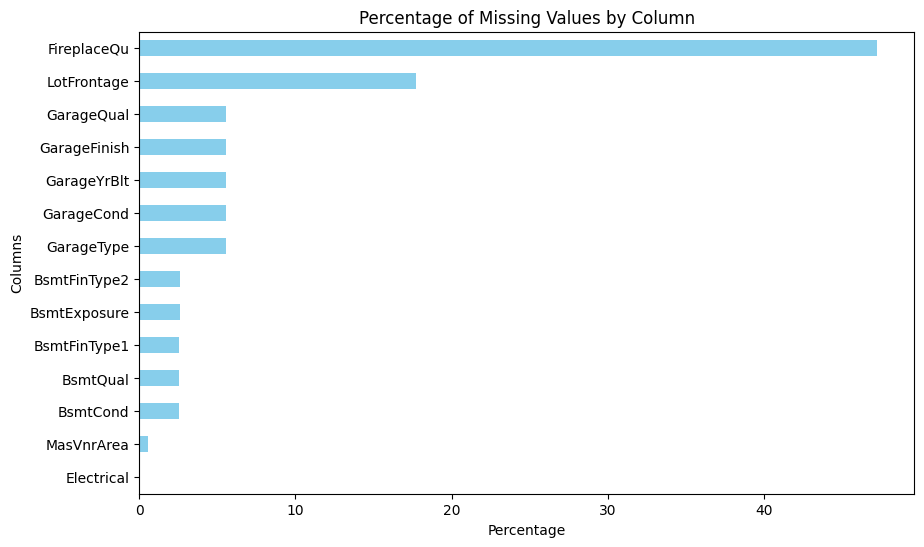

In [10]:

# Calculate the percentage of missing values for each column
null_percentage = train.isnull().mean() * 100

# Filter columns with missing values
missing_columns = null_percentage[null_percentage > 0]

# Print column names with missing values
print("Columns with missing values:")
print(missing_columns.index.tolist())

# Plot bar graph for missing values
plt.figure(figsize=(10, 6))
missing_columns.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show()


#### Maximum null values in LotFrontage column are around 18% which we can further investigate after the EDA

### MAKE SEPERATE DATAFRAME FOR NUMERICAL AND CATEGORICAL VARIABLE BEFORE ANALYSIS 

In [11]:
train_num = train[train.select_dtypes(include=['int64','float64']).columns]

In [12]:
train_obj = train[train.select_dtypes(include=['object']).columns]

In [13]:
if len(train_num.columns) + len(train_obj.columns) == len(train.columns):
    print(f'True: {len(train_num.columns)} + {len(train_obj.columns)} = {len(train.columns)}')
else:
    print(f'False: {len(train_num.columns)} + {len(train_obj.columns)} != {len(train.columns)}')

True: 37 + 38 = 75


In [14]:
pd.set_option('display.max_columns', None)
train_num.describe(include=['int64', 'float64'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
#Check the distinct values in each column
train_num.nunique().sort_values(ascending = True)

HalfBath            3
BsmtHalfBath        3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

In [16]:
# We can consider MSSubClass as categorical because the numbers are not defining any measure
train_num.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

#### There are several columns that are integer type but should be considered as categorical data type. Any column that has limited number of values (upto 15) can be considered as categorical data.

In [17]:
cols_to_convert = train_num.nunique()[train_num.nunique() <= 15].index.tolist()
train_num[cols_to_convert] = train_num[cols_to_convert].astype('category')

In [18]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   LotFrontage    1201 non-null   float64 
 2   LotArea        1460 non-null   int64   
 3   OverallQual    1460 non-null   category
 4   OverallCond    1460 non-null   category
 5   YearBuilt      1460 non-null   int64   
 6   YearRemodAdd   1460 non-null   int64   
 7   MasVnrArea     1452 non-null   float64 
 8   BsmtFinSF1     1460 non-null   int64   
 9   BsmtFinSF2     1460 non-null   int64   
 10  BsmtUnfSF      1460 non-null   int64   
 11  TotalBsmtSF    1460 non-null   int64   
 12  1stFlrSF       1460 non-null   int64   
 13  2ndFlrSF       1460 non-null   int64   
 14  LowQualFinSF   1460 non-null   int64   
 15  GrLivArea      1460 non-null   int64   
 16  BsmtFullBath   1460 non-null   category
 17  BsmtHalfBath   1460 non-null   ca

#### NUMERICAL DATATYPES CONVERTED TO CATEGORICAL WHERE REQUIRED.
#### LET'S CONVERT OBJECT DATATYPES TO CATEGORICAL AND DROP THE ONES THAT ARE NOT REQUIRED.

In [19]:
train_obj.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,1267,1198


In [20]:
# CHecking the neighborhood feature that has high number of categories
train_obj.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

#### Looks like these are neighborhoods existing around the houses.
#### All object datatype has valid categorical feature. Let's convert it into categories to reduce the space required by the DataFrame features.

In [21]:
train_obj = train_obj.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

In [22]:
train_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   LotShape       1460 non-null   category
 3   LandContour    1460 non-null   category
 4   Utilities      1460 non-null   category
 5   LotConfig      1460 non-null   category
 6   LandSlope      1460 non-null   category
 7   Neighborhood   1460 non-null   category
 8   Condition1     1460 non-null   category
 9   Condition2     1460 non-null   category
 10  BldgType       1460 non-null   category
 11  HouseStyle     1460 non-null   category
 12  RoofStyle      1460 non-null   category
 13  RoofMatl       1460 non-null   category
 14  Exterior1st    1460 non-null   category
 15  Exterior2nd    1460 non-null   category
 16  ExterQual      1460 non-null   category
 17  ExterCond      1460 non-null   ca

In [23]:
# Combine the train_num and train_obj to make train_cleaned dataset
train_cleaned = pd.concat([train_num, train_obj], axis=1)

#### Let's do some exploratory data analysis now

# EXPLORATORY DATA ANALYSIS
## UNIVARIATE ANALYSIS
### INTEGER AND FLOAT DATATYPES

In [24]:
# Function to create boxplots and histograms for any input numerical variables.

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(15,7), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    
    """
    mean = np.mean(data)

    sns.set_theme(font_scale = font_scale) # setting the font scale of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.25, .75)}, figsize = figsize) # creating the 2 subplot
    sns.boxplot(x = data, ax = ax_box2, showmeans = True, color = "violet") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x = data, kde = False, ax = ax_hist2, bins = bins, palette="winter") if bins else sns.histplot(x = data, kde = False, ax = ax_hist2, color = "lightblue") # histogram will be made
    ax_hist2.axvline(mean, color = 'g', linestyle = '--') # mean will shown as vertical line in the histogram
    if xlabel: ax_hist2.set(xlabel = xlabel) # xlabel
    if title: ax_box2.set(title = title) # title of the graph
    plt.show() # display the graph

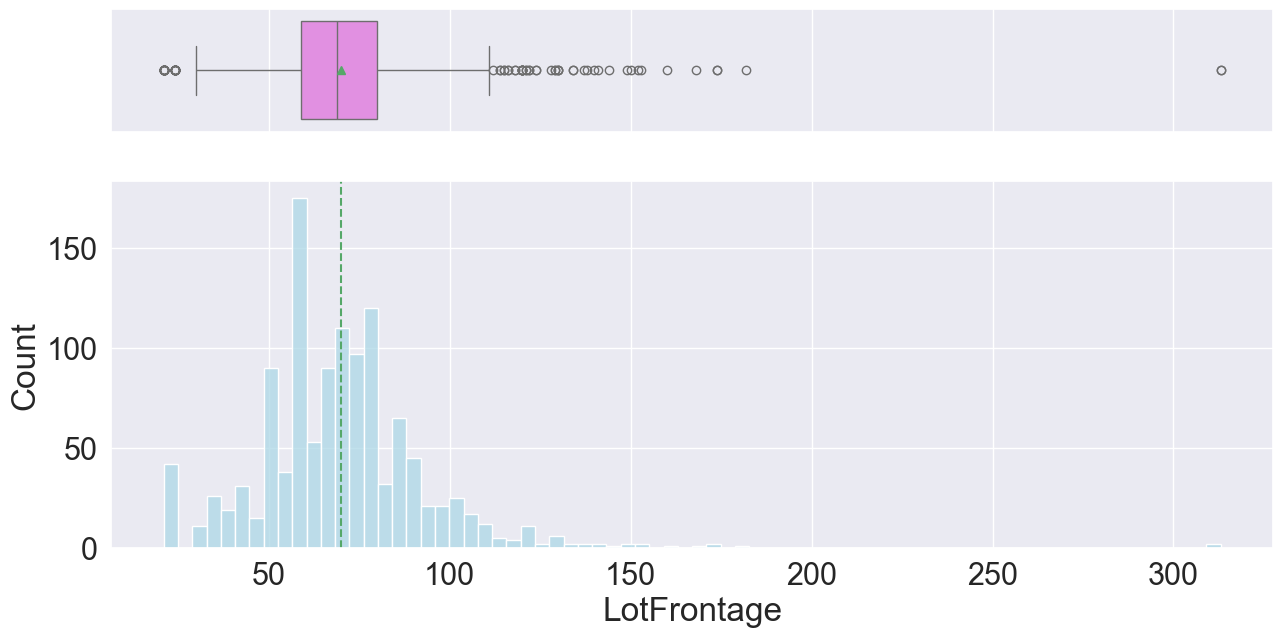

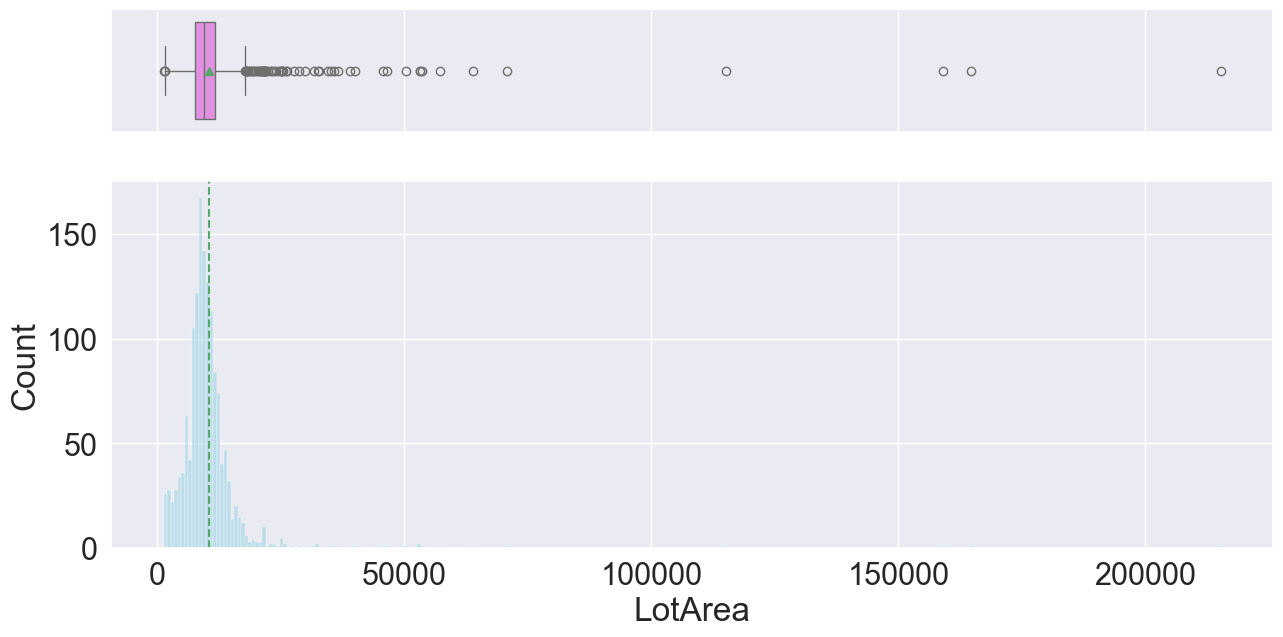

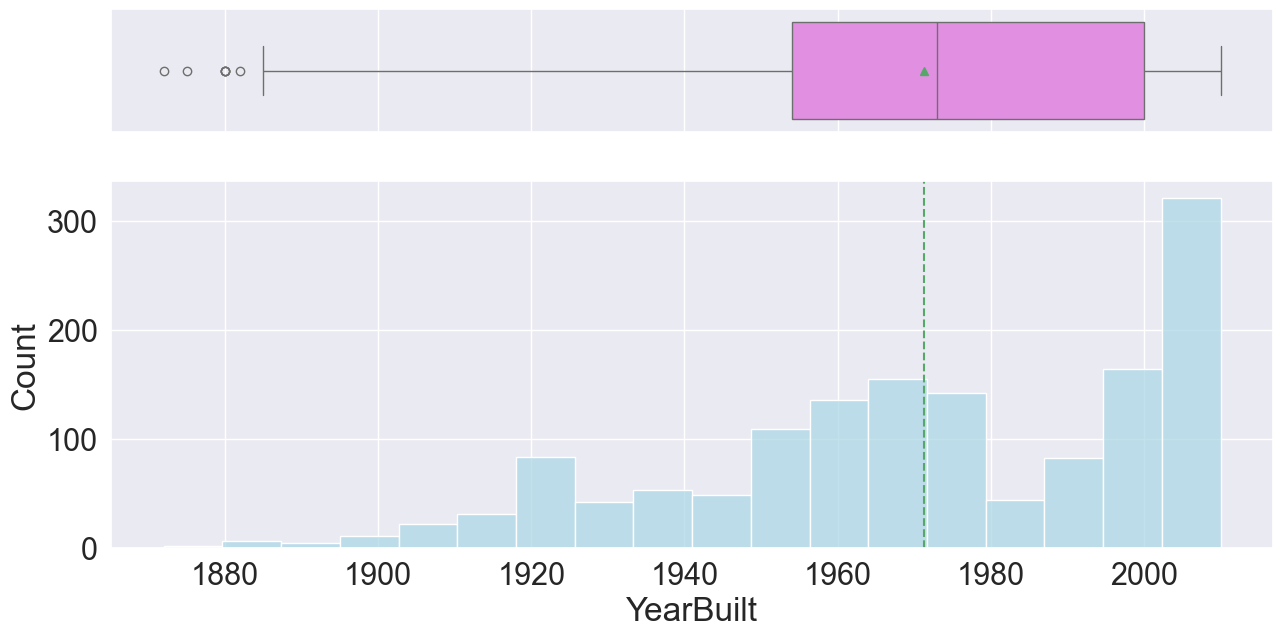

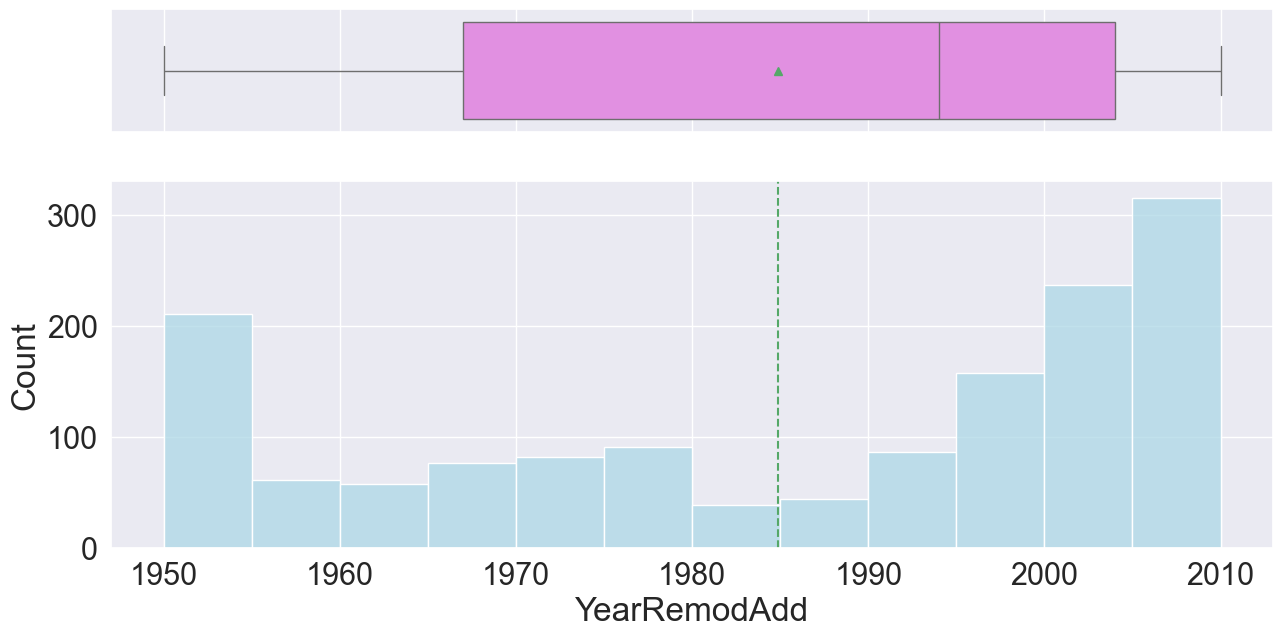

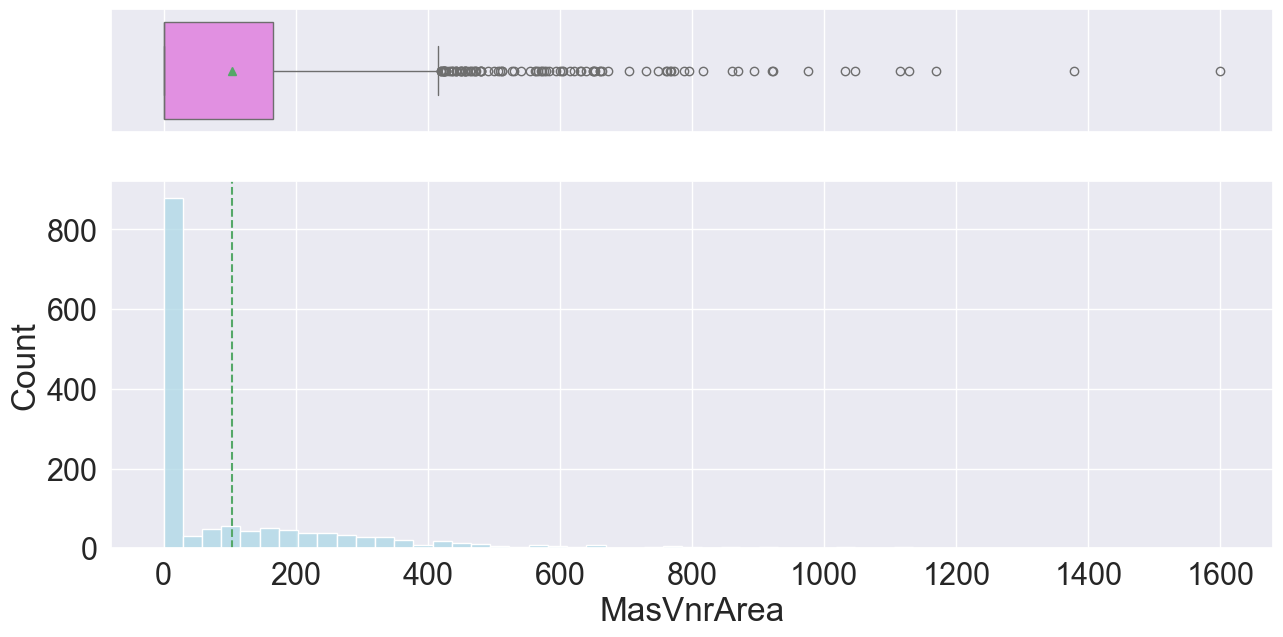

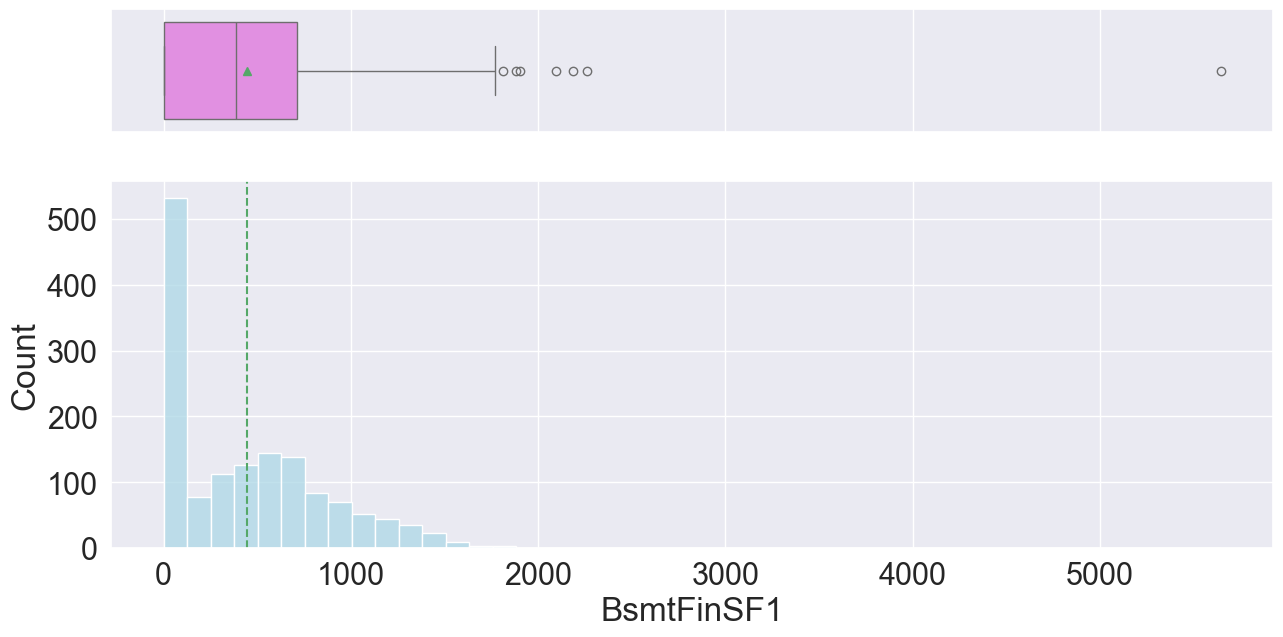

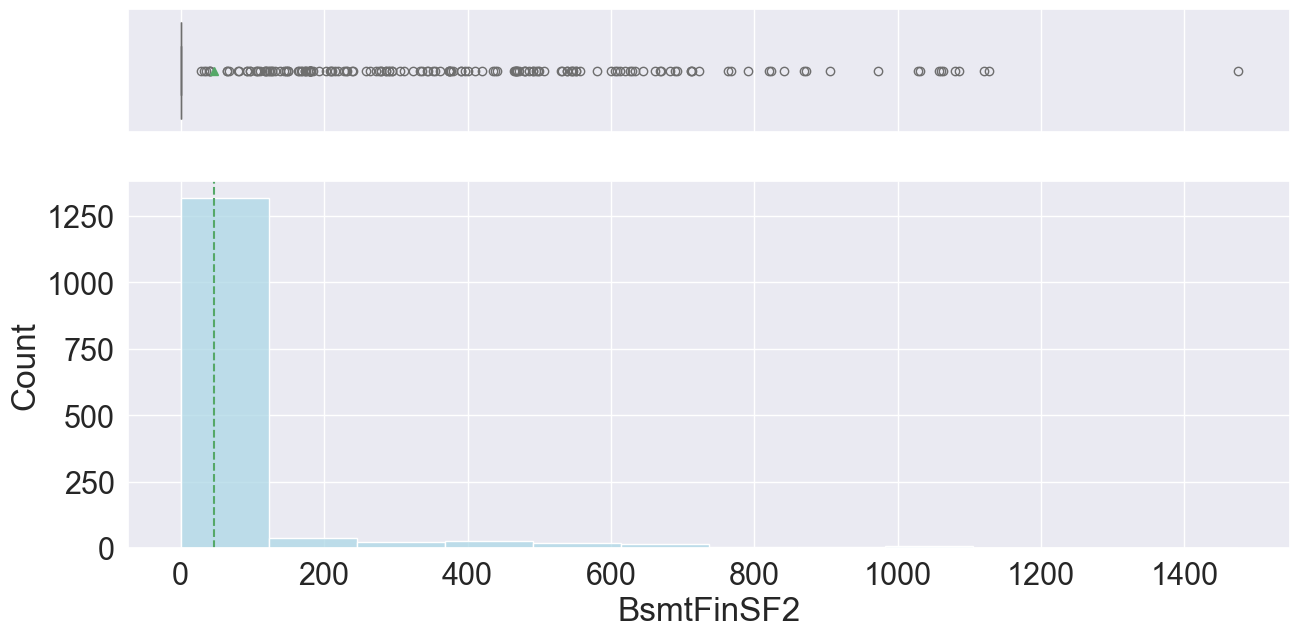

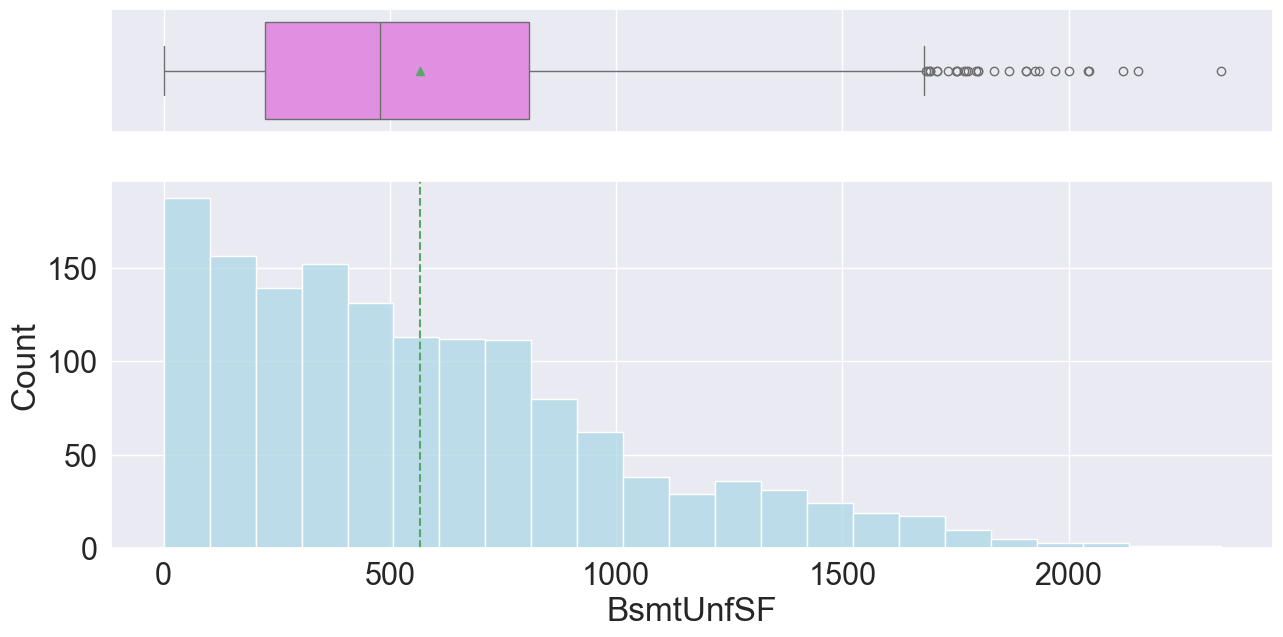

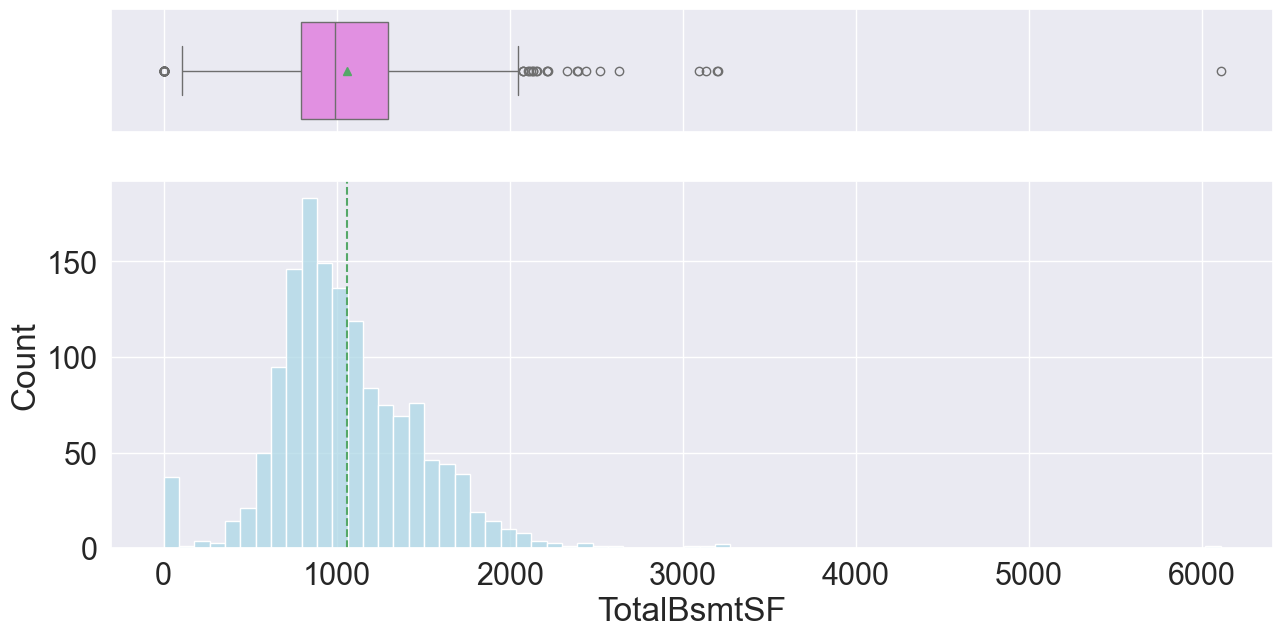

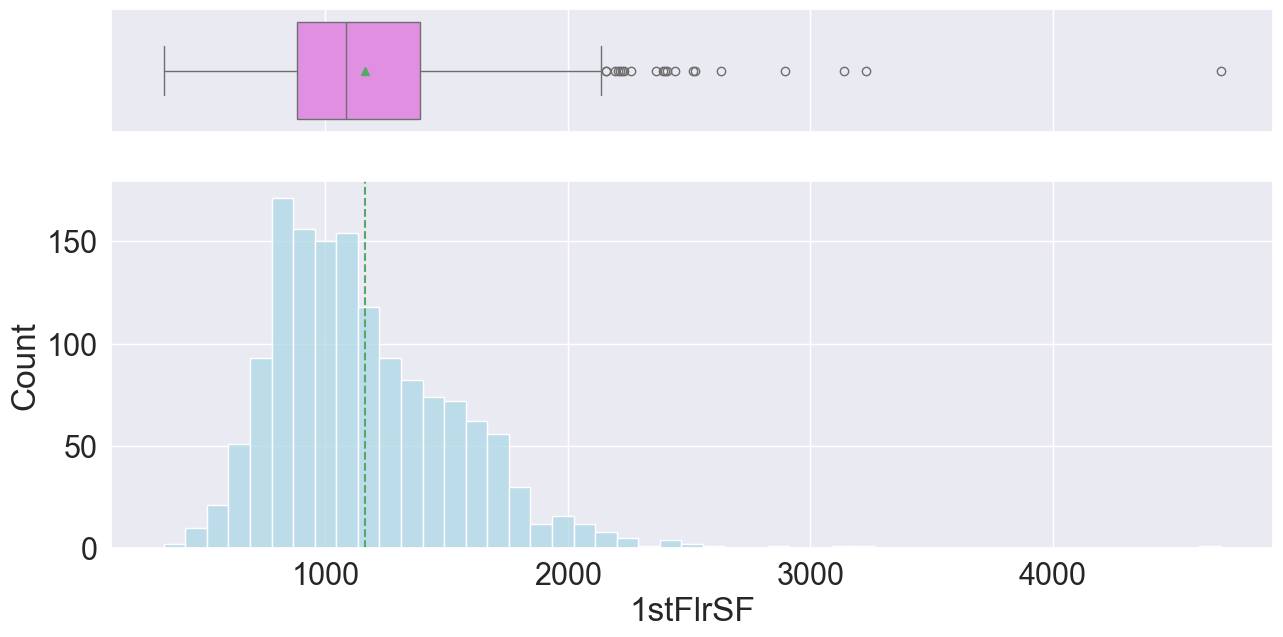

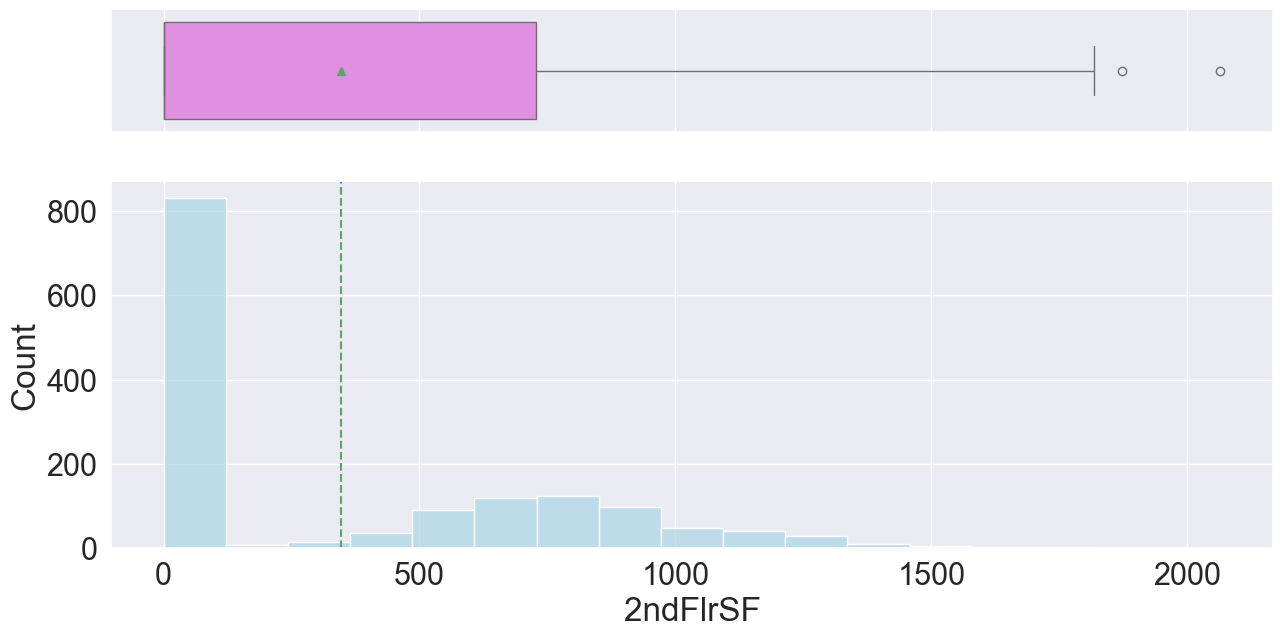

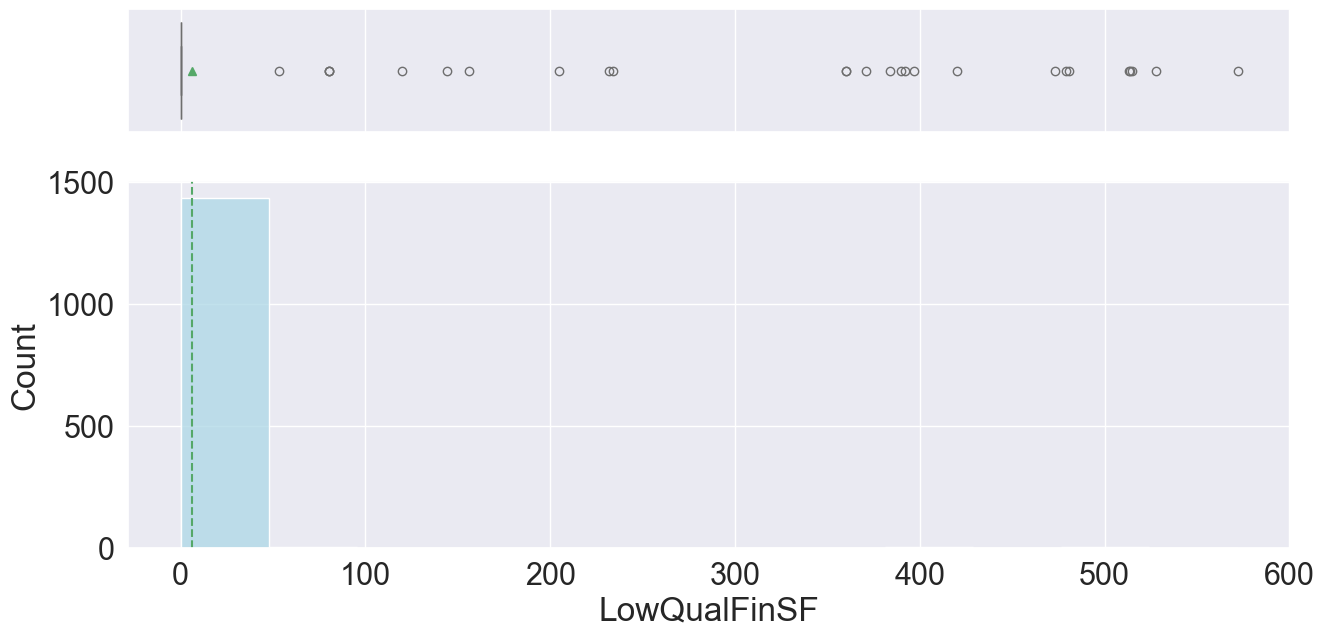

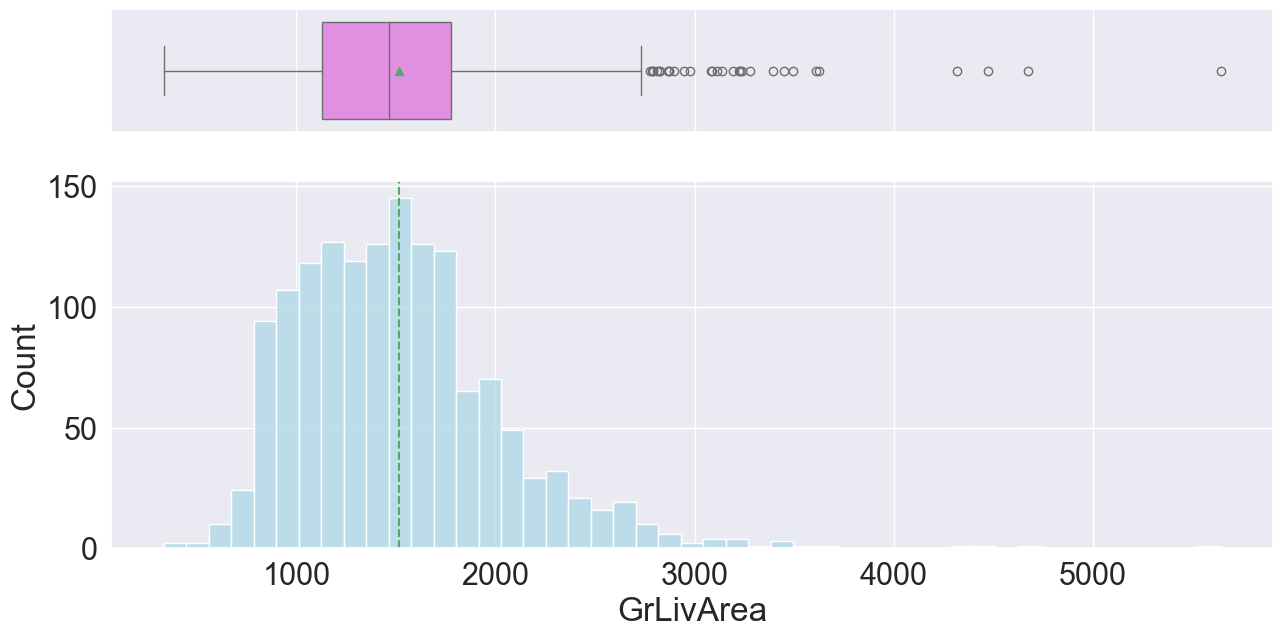

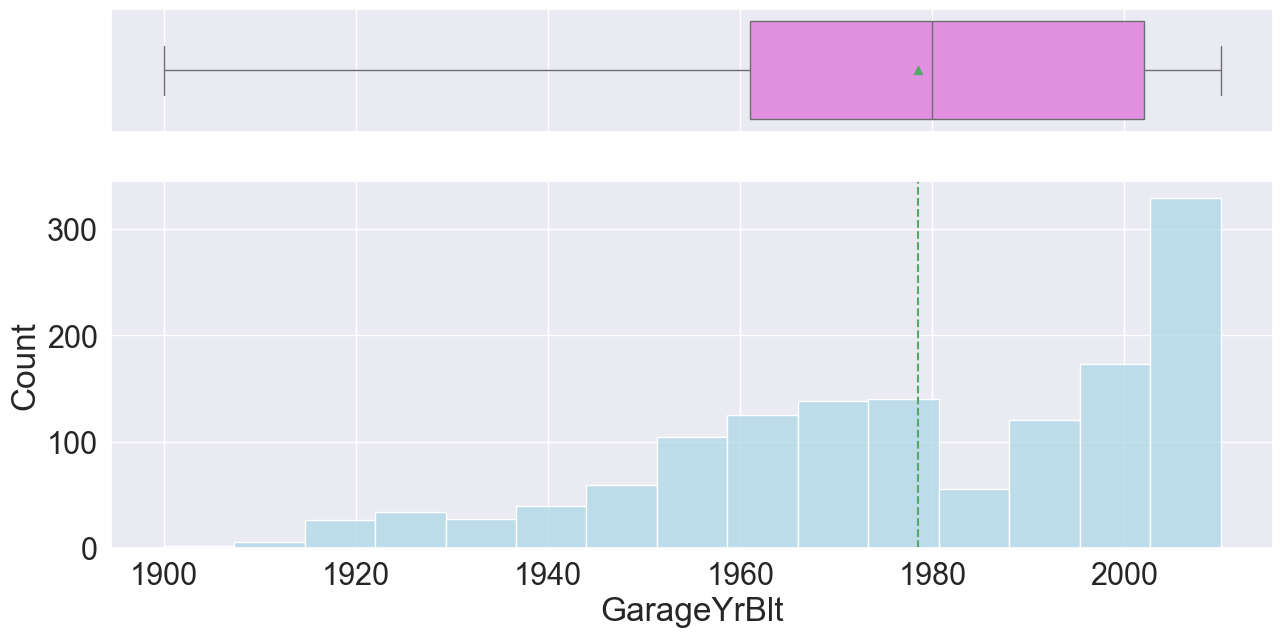

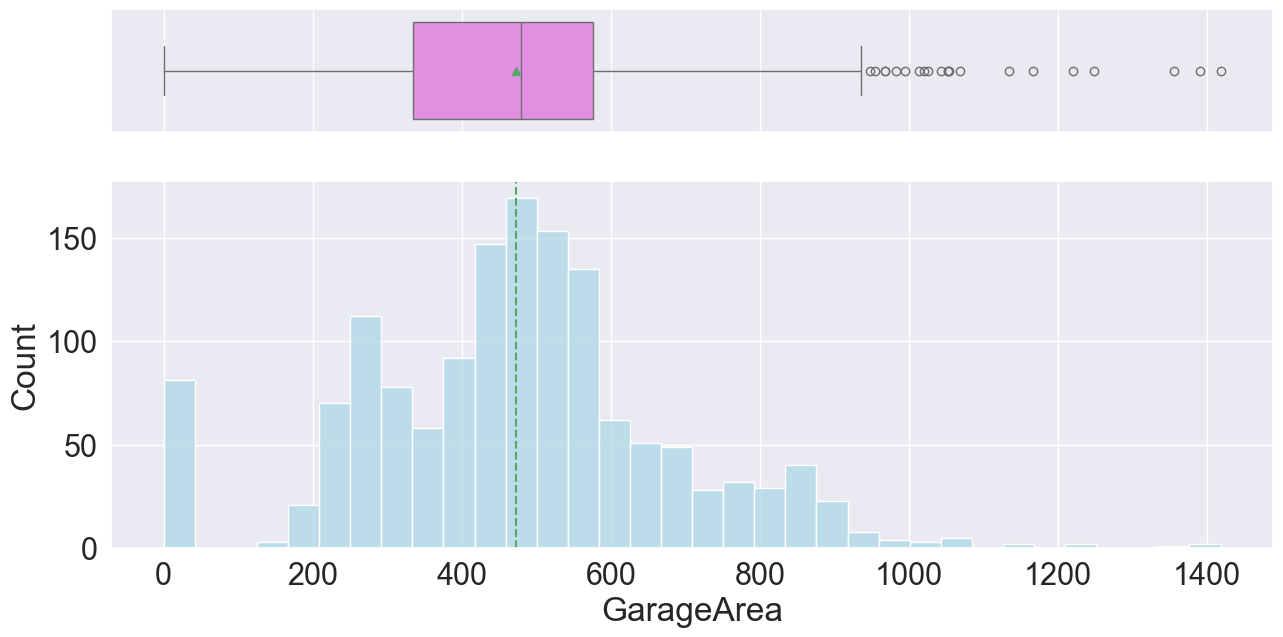

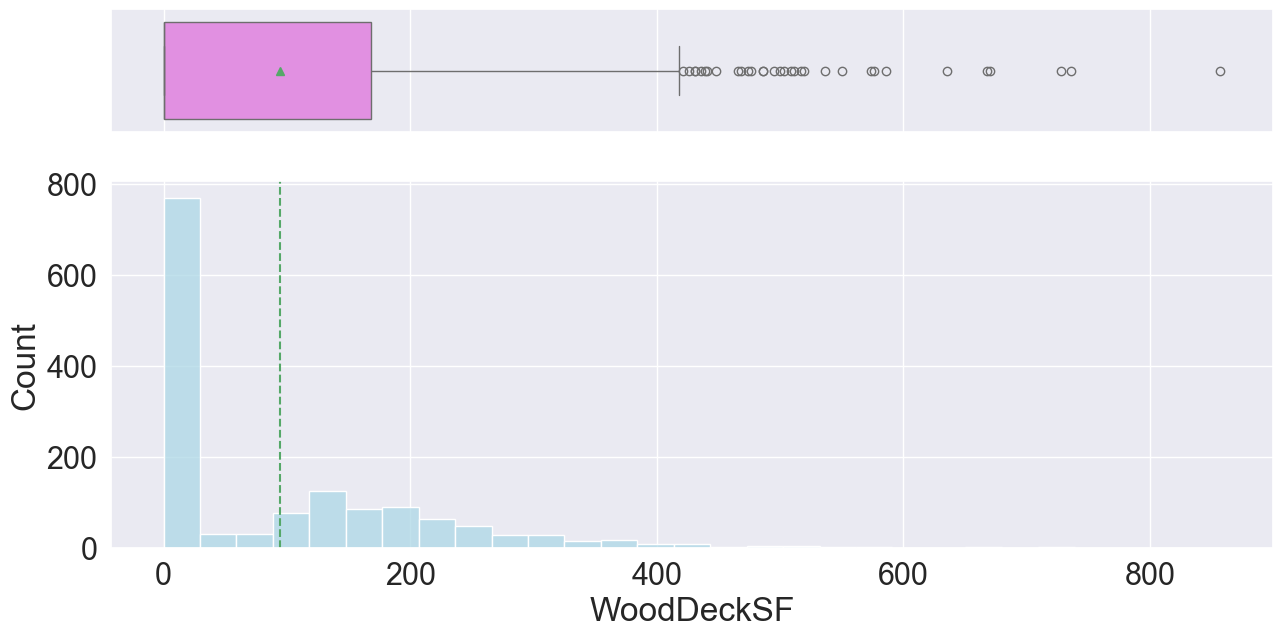

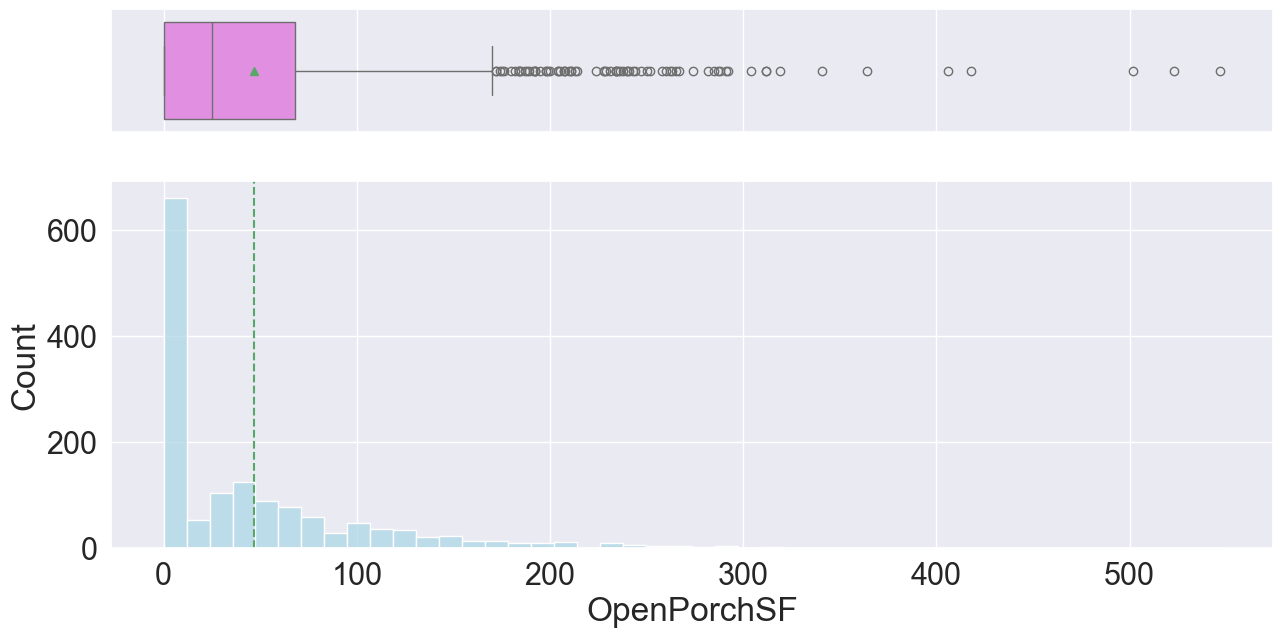

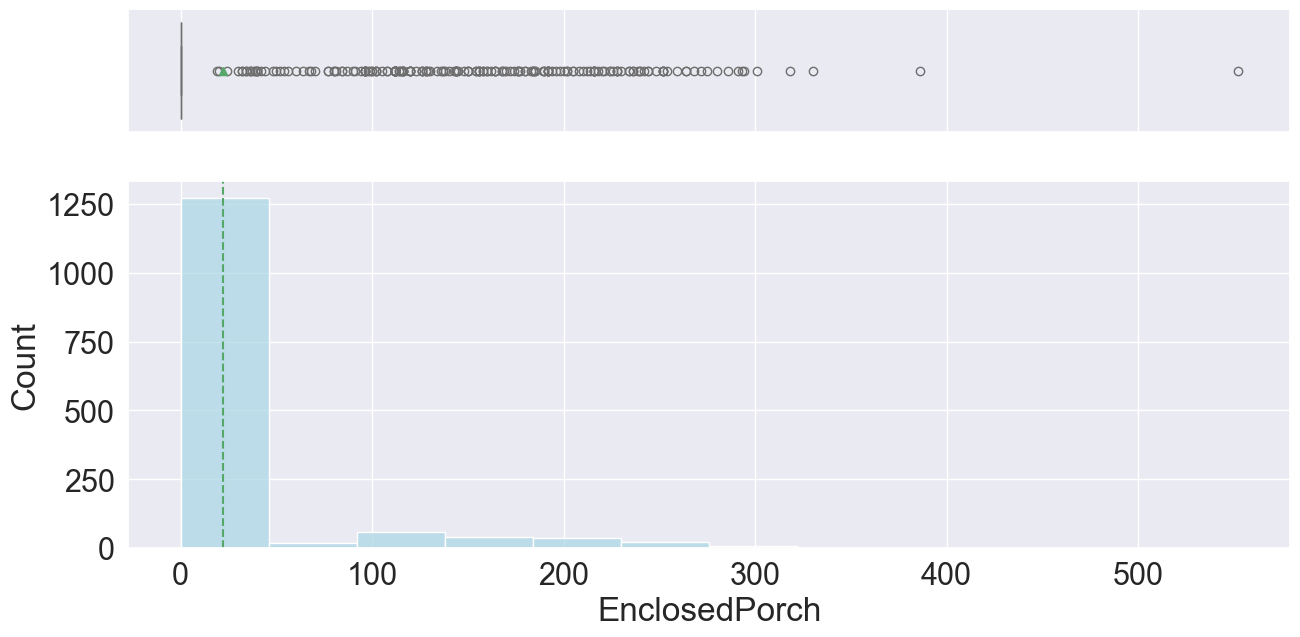

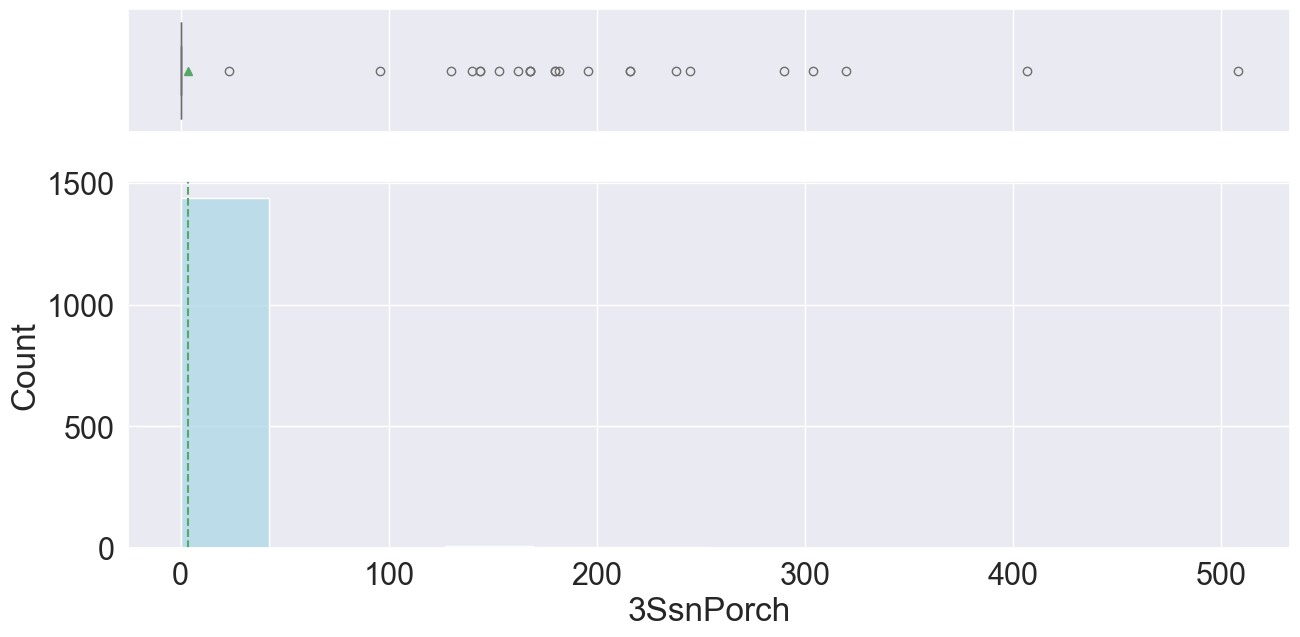

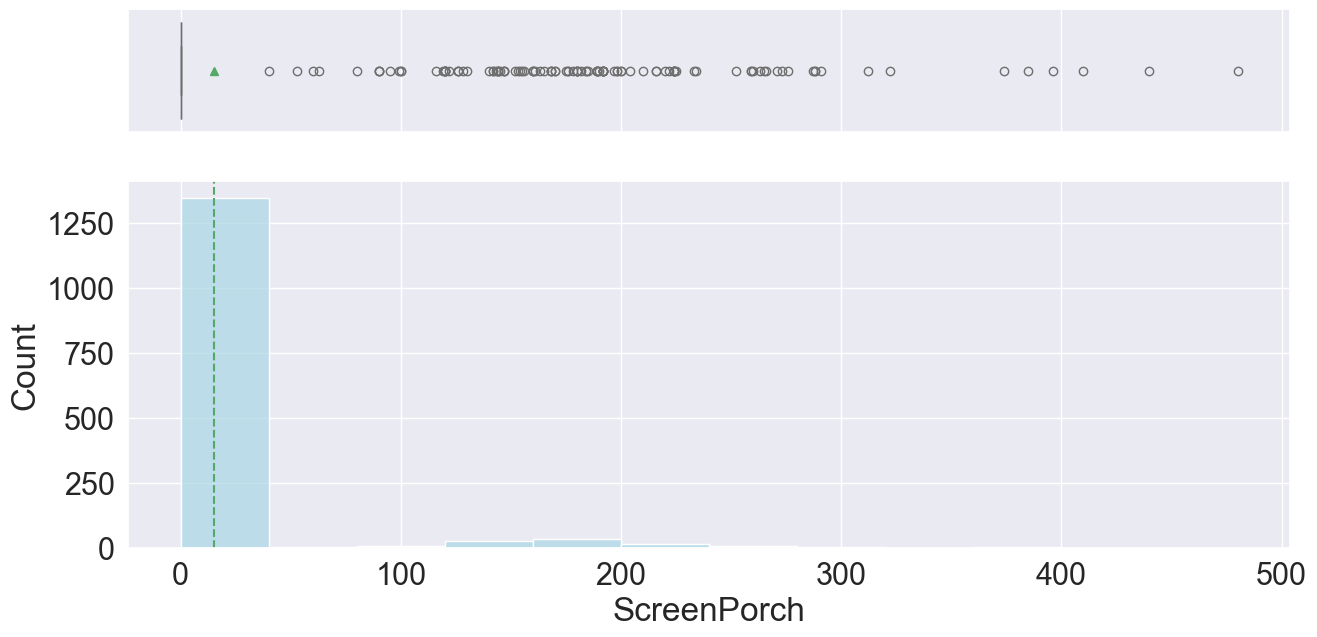

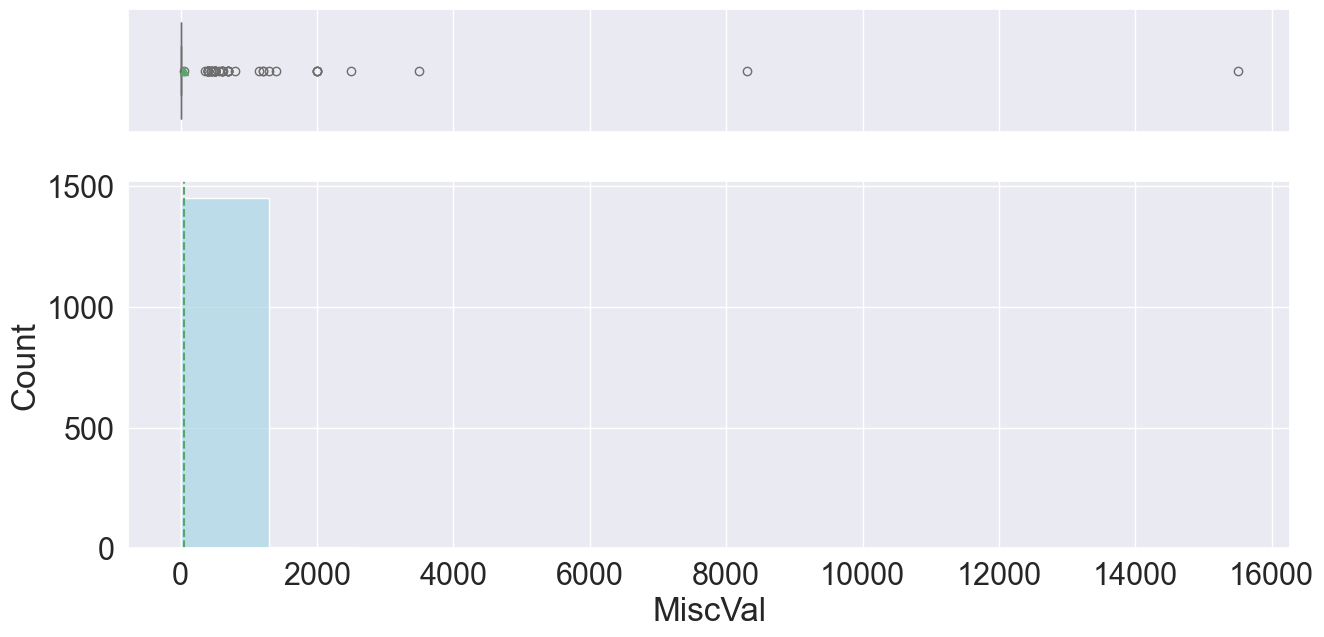

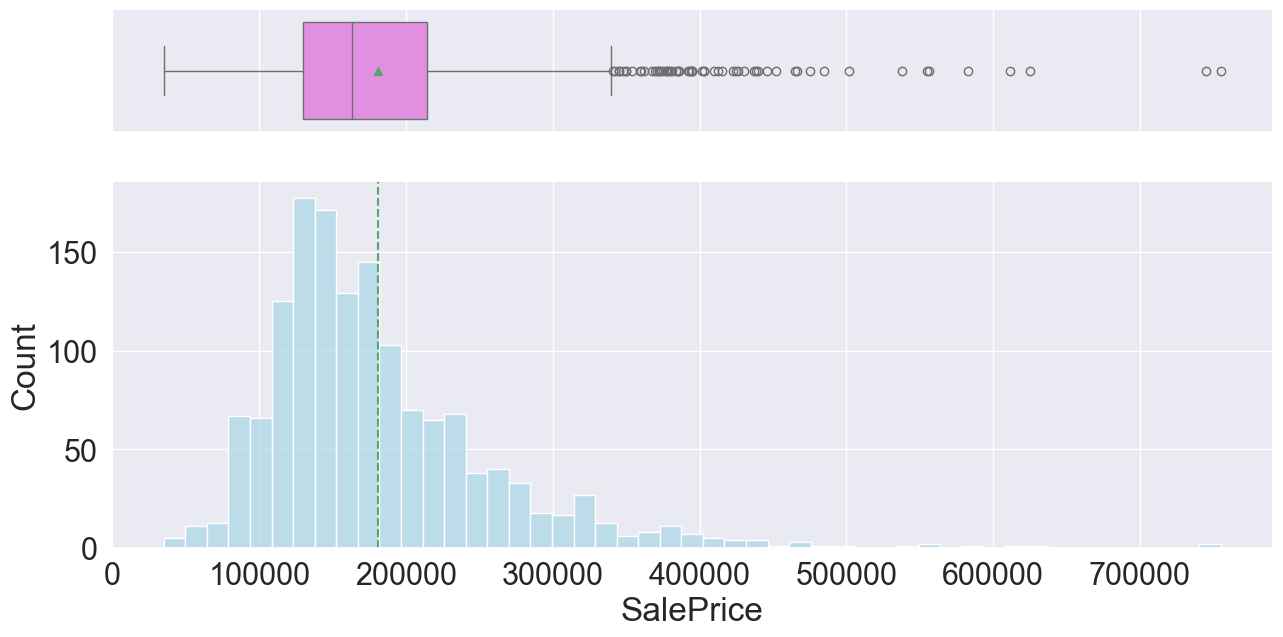

In [25]:
for col in train_cleaned.select_dtypes(['int','float']):
    histogram_boxplot(train_cleaned[col])

In [26]:
train_cleaned.select_dtypes(['int','float']).describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,755000.000000


## Insights from the Data:
LotFrontage: The average frontage is around 70 feet, with a significant spread in values (from 21 to 313 feet). Most lots have a frontage between 59 and 80 feet.

LotArea: Lot areas vary widely, with most properties having areas between 7,553 and 11,601 square feet. However, there are some properties with exceptionally large lot areas (up to 215,245 square feet).

YearBuilt: Homes are primarily built around the early 1970s, with the oldest built in 1872 and the newest in 2010. Most houses are from the 1970s to 2000s.

YearRemodAdd: Most properties were remodeled around the mid-1980s to early 2000s. A few were remodeled in the last few years.

MasVnrArea: This feature reflects the masonry veneer area, which is predominantly 0 for many homes, but some properties have areas as large as 1,600 square feet.

BsmtFinSF1 & BsmtFinSF2: These features refer to finished basement areas, with significant variance. Many properties have no finished basement, while others have large finished areas.

BsmtUnfSF & TotalBsmtSF: Reflecting unfinished basement area and total basement area, these features suggest that a number of homes have significant basement space, but many have zero values, indicating no basement or unfinished basement.

1stFlrSF & 2ndFlrSF: The first floor area has an average of 1,162 square feet, with most homes falling between 880 and 1,391 square feet. Second-floor areas are significantly smaller, with many homes having no second floor.

GrLivArea: This reflects the above-ground living area and is one of the most important features for price prediction. The average is around 1,515 square feet, with a substantial range from 334 to 5,642 square feet.

GarageArea: Many homes have garages, and the average area is 473 square feet. A few homes do not have garages, as indicated by 0 values.

SalePrice: The target variable, SalePrice, has a wide distribution, with a mean around $180,921. The prices range from a minimum of $34,900 to a maximum of $755,000, indicating a significant spread across the properties.

### Outlier Treatment
#### LotFrontage:
The minimum value is 21, which seems low compared to the mean (70.05).
The maximum value is 313, which is very high relative to the mean and 75th percentile (80).
Outlier Treatment: Apply the IQR method to remove values below the 1st quartile - 1.5IQR and above the 3rd quartile + 1.5IQR.

#### LotArea:
The minimum value is 1300, and the maximum value is 215,245.
The mean (10,516) is much lower than the maximum, indicating a potential outlier.
Outlier Treatment: Apply the IQR method or cap values based on the 95th percentile.

#### MasVnrArea:
The minimum value is 0, and the maximum value is 1600.
A value of 1600 seems large compared to the mean (103.69).
Outlier Treatment: Consider removing or capping values above the 95th percentile.

#### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF:
BsmtFinSF1 and BsmtFinSF2 have large maximum values (5644 and 1474), indicating potential outliers.
BsmtUnfSF and TotalBsmtSF also show large values compared to the mean (438.7 for TotalBsmtSF).
Outlier Treatment: Cap or remove values that are far beyond the 75th percentile using IQR.

#### 1stFlrSF and 2ndFlrSF:
The maximum values (4692 and 2065) are high compared to the mean (1162 for 1stFlrSF and 347 for 2ndFlrSF).
Outlier Treatment: Apply IQR method or capping.

#### GrLivArea:
The maximum value (5642) is much higher than the mean (1515.46), indicating a possible outlier.
Outlier Treatment: Consider capping values beyond the 95th percentile or using the IQR method.

#### GarageArea:
The maximum value (1418) is high compared to the mean (472.98).
Outlier Treatment: Use the IQR method for outlier treatment.
MiscVal:

The maximum value (15,500) compared to the mean (43.49) indicates a significant outlier.
Outlier Treatment: Remove or cap values above a certain threshold, such as the 95th percentile.

#### Check for Removal
BsmtFinSF2: Most values are close to zero, with a few outliers. If the majority of entries are zero, this feature may not be informative.

#### LowQualFinSF: Contains mostly zeros, suggesting that very few houses have low-quality finished areas. Consider removing if uninformative.

1. 3SsnPorch
Observation: Rarely occurs in the dataset, and most entries are zero.
Recommendation: Given that this feature has a high concentration of zeros and a low occurrence, it likely does not carry much predictive value.
2. EnclosedPorch
Observation: Some spread, but most values are small. Outliers may need treatment.
Recommendation: If most values are small, but there are a few large ones, consider treating the outliers (e.g., using winsorization or applying a transformation).
3. ScreenPorch
Observation: Many zero values, with a few extreme high values.
Recommendation: Similar to EnclosedPorch, the presence of a few extreme values suggests this feature might have significance for certain properties.
4. PoolArea
Observation: Mostly zeros, with very few houses having pools.
Recommendation: This feature is highly sparse with a lot of zeros, which suggests it has very low predictive power for the majority of the dataset.
5. MiscVal
Observation: Contains mostly zero values, except for a few extreme cases.
Recommendation: Given that this column has a lot of zeros and a few extreme cases, it doesn’t seem to provide much information.
6. LowQualFinSF
Observation: Contains mostly zero values, except for a few extreme cases.
Recommendation: This feature also exhibits a sparse pattern similar to MiscVal and PoolArea, with very few non-zero values.
7. BsmtFinSF2
Observation: Contains mostly zero values, except for a few extreme cases.
Recommendation: Similar to LowQualFinSF, this feature has a sparse distribution and doesn't seem to provide much predictive value.

### Final Recommendations on numerical features:
#### Consider Removal:
    3SsnPorch, PoolArea, MiscVal, LowQualFinSF, BsmtFinSF2
#### Consider Outlier Treatment:
    EnclosedPorch, ScreenPorch

## EDA - Categorical Features

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(ax,feature_name, feature_val):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    plt.xlabel(feature_name,fontsize=16)  # Set fontsize for x-axis label
    plt.ylabel('Count',fontsize=16)       # Set fontsize for y-axis label
    plt.title(feature_name, fontsize=20)
    plt.xticks(size = 14)  # Set fontsize for x-axis ticks
    plt.yticks(size = 14)  # Set fontsize for x-axis ticks
    total = len(feature_val) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() + 0.5         # height of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percentage 
    plt.show() # show the plot

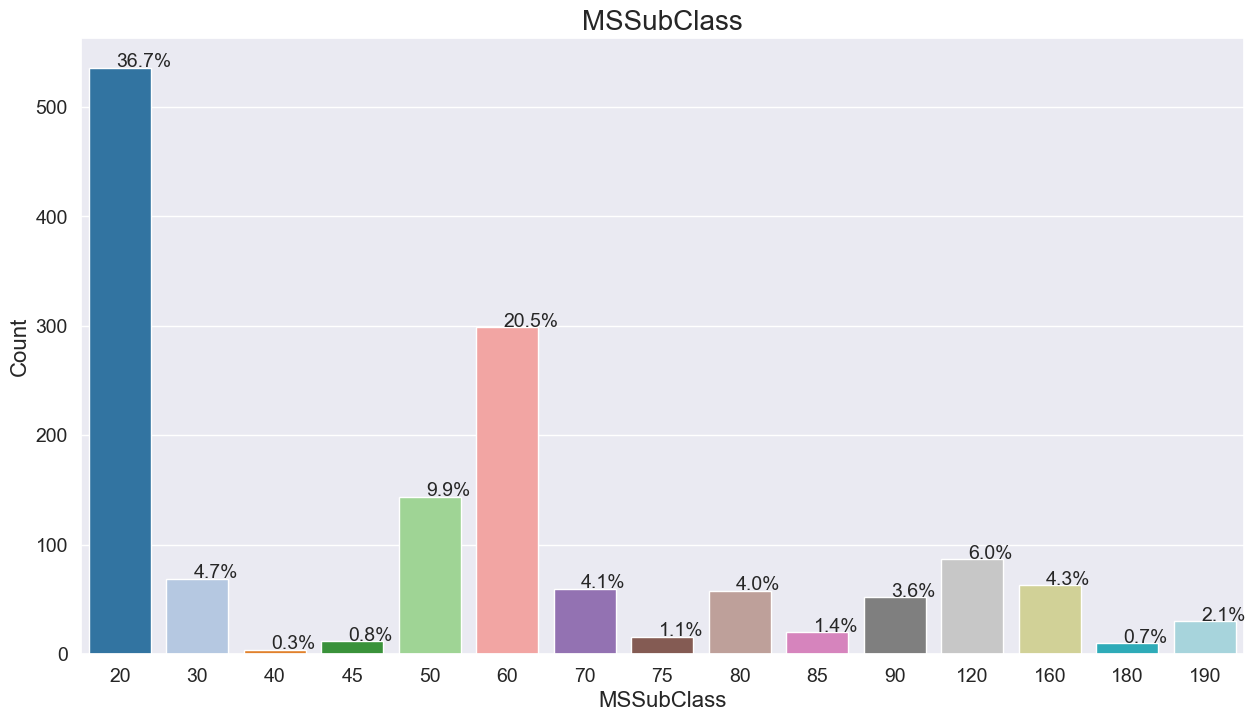

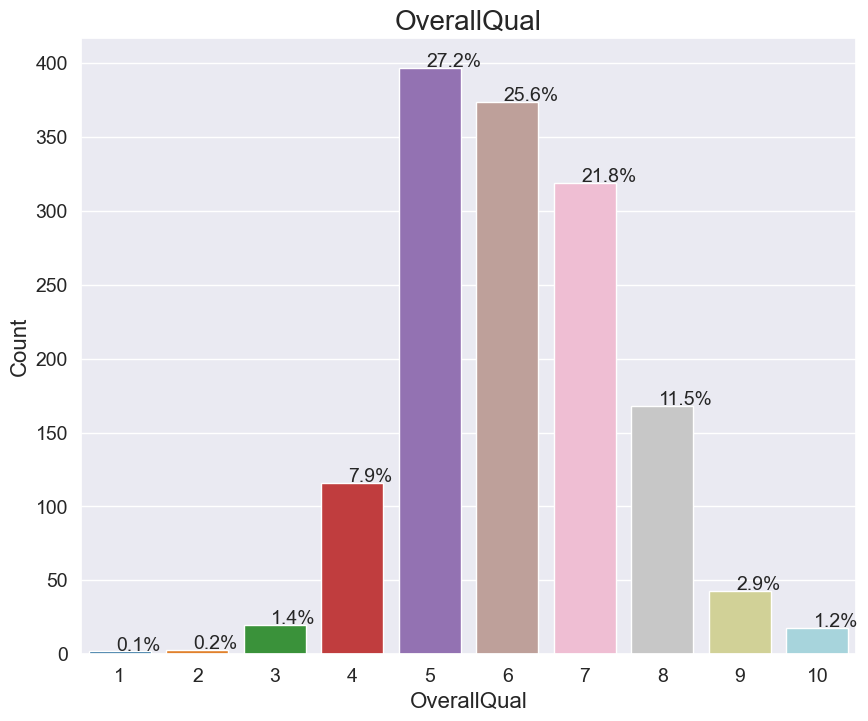

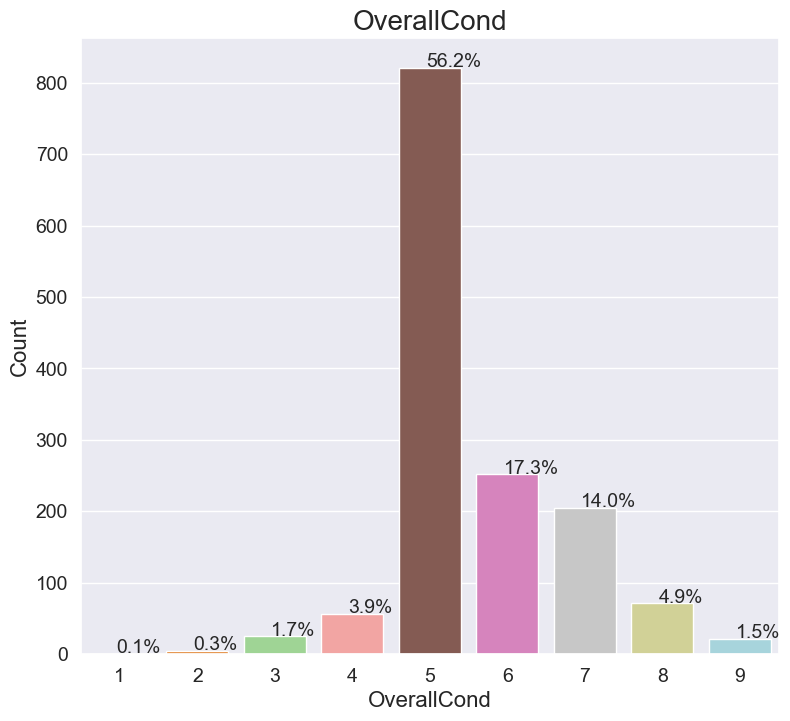

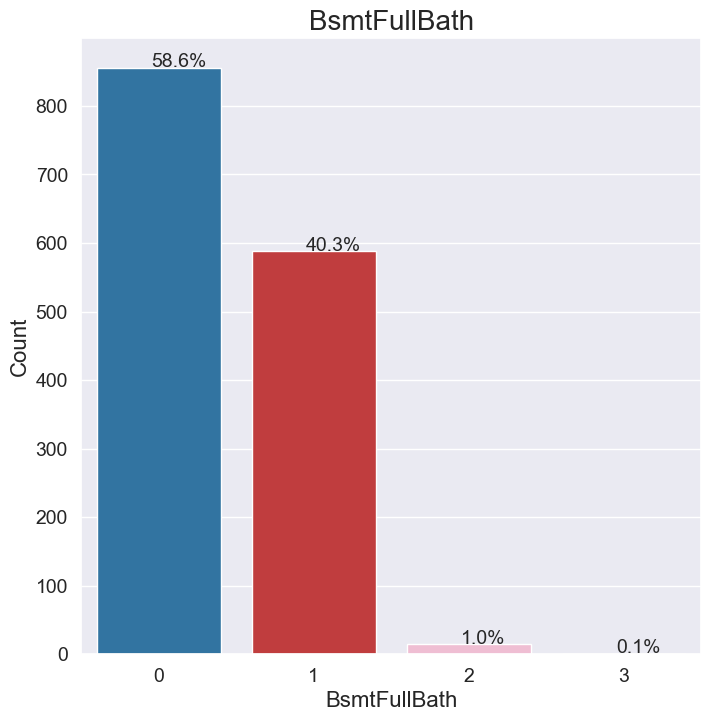

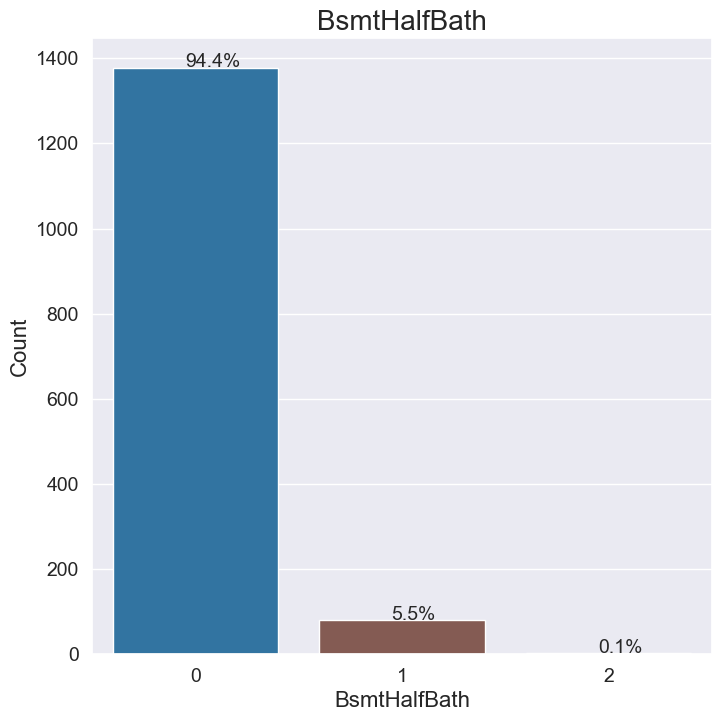

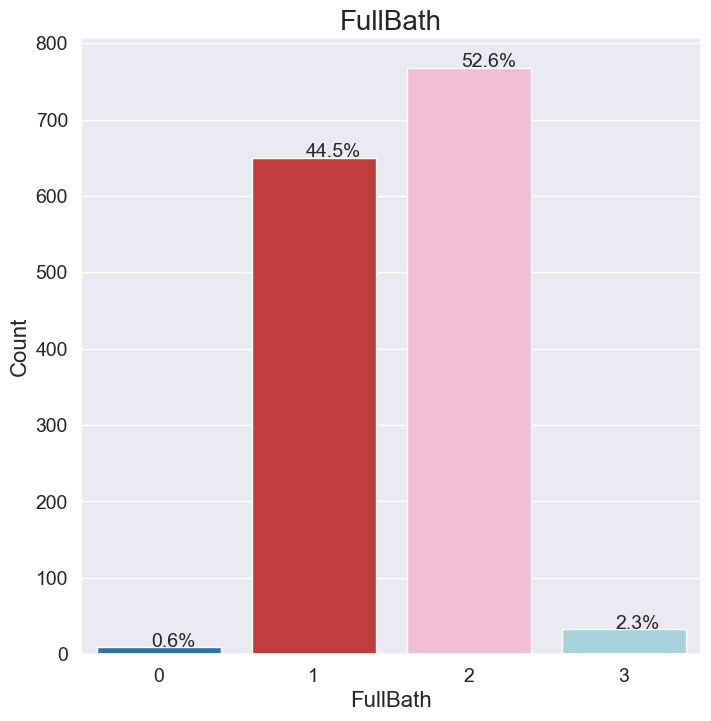

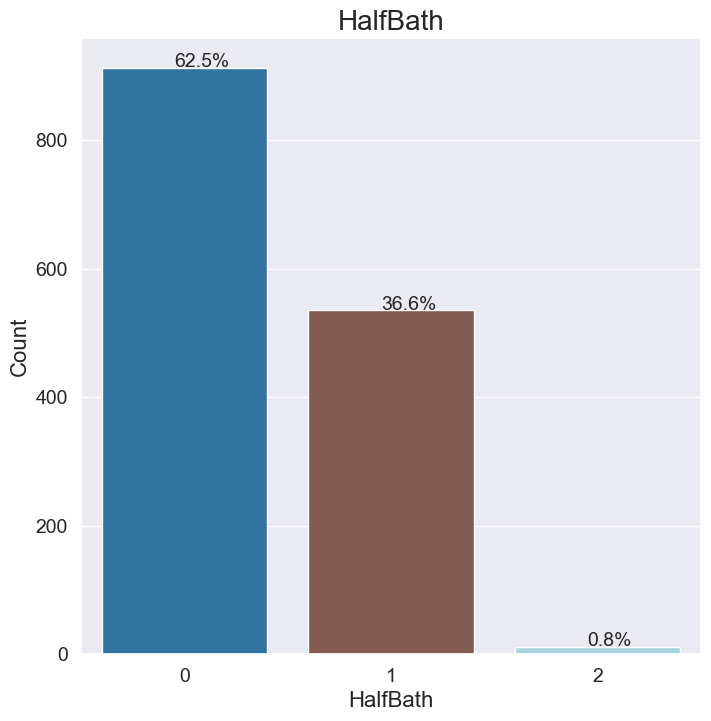

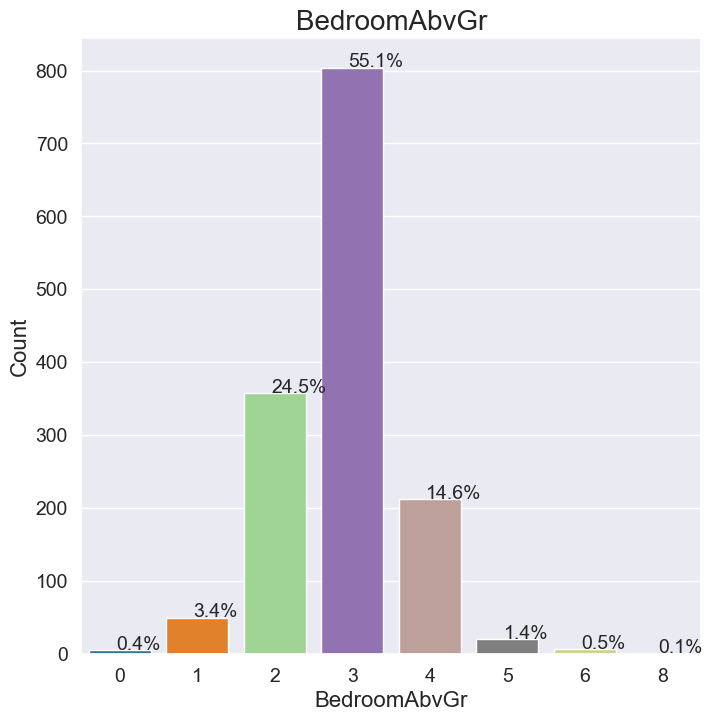

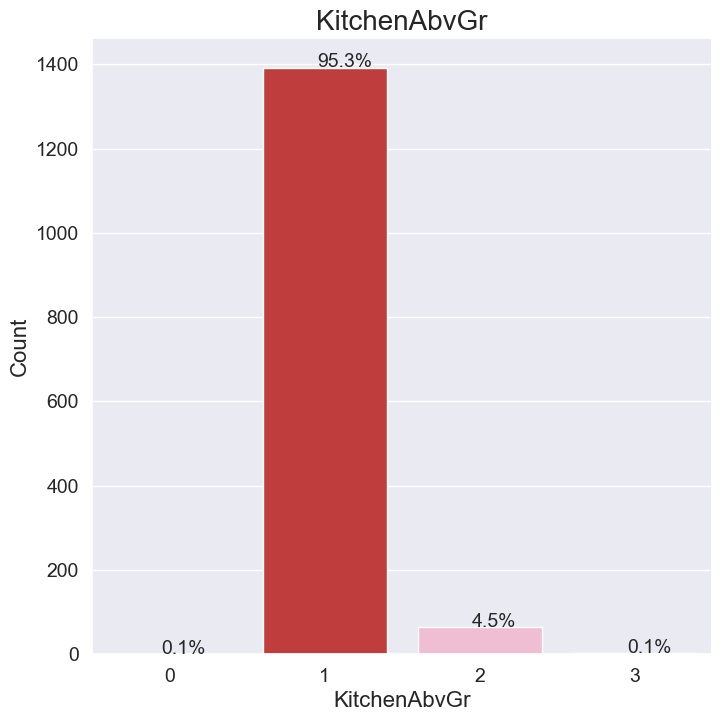

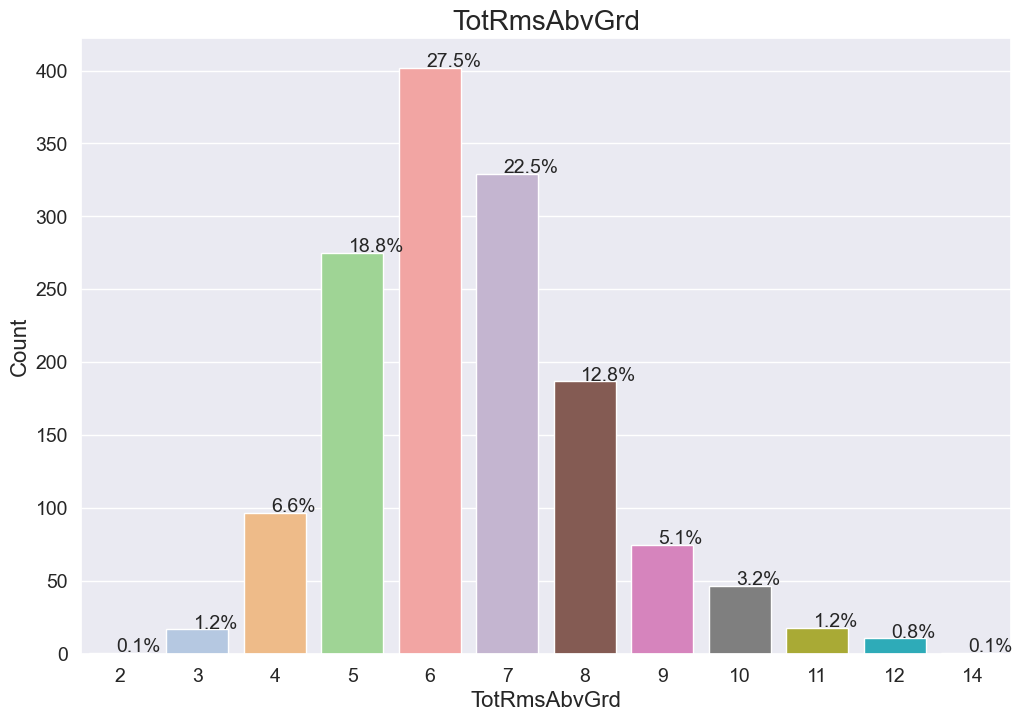

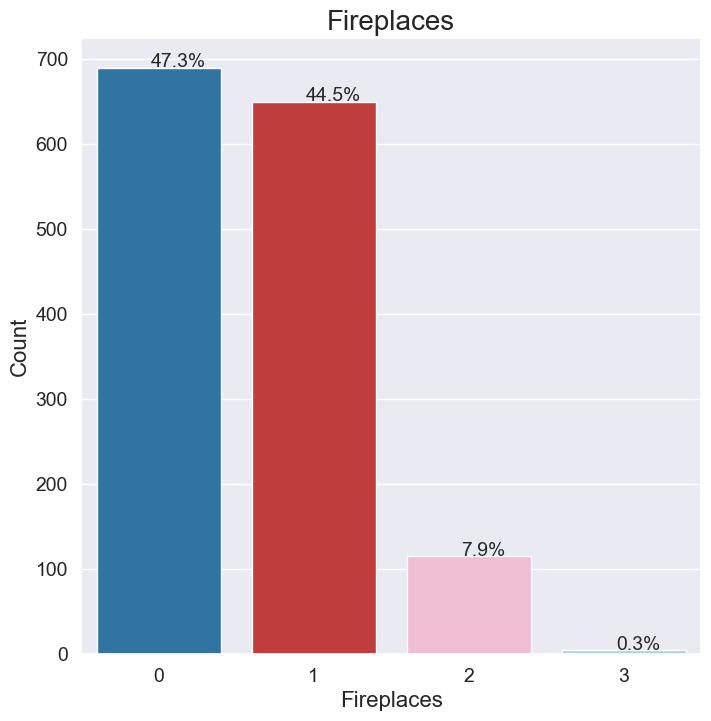

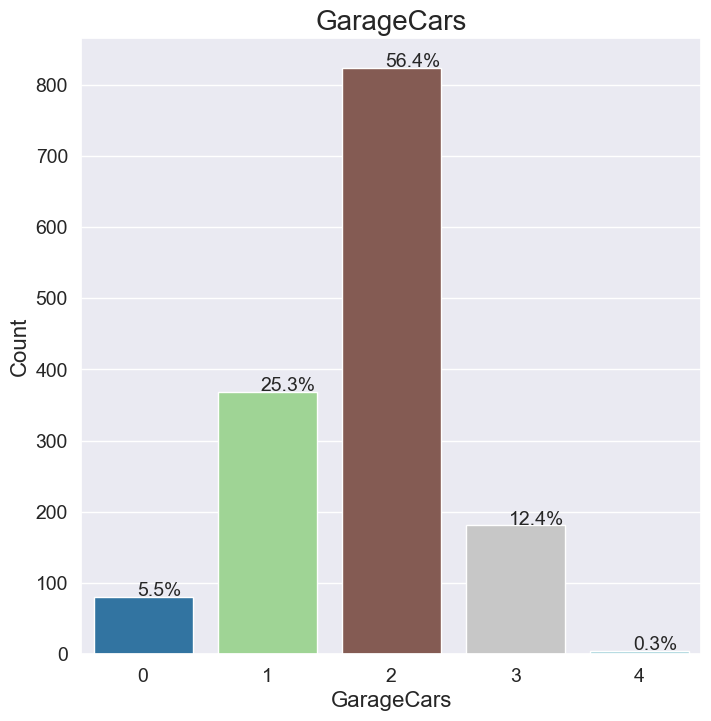

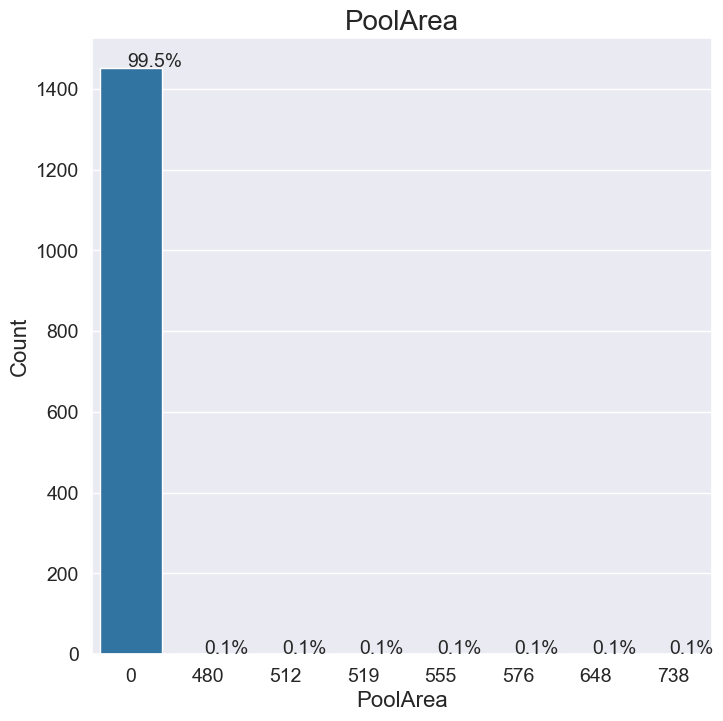

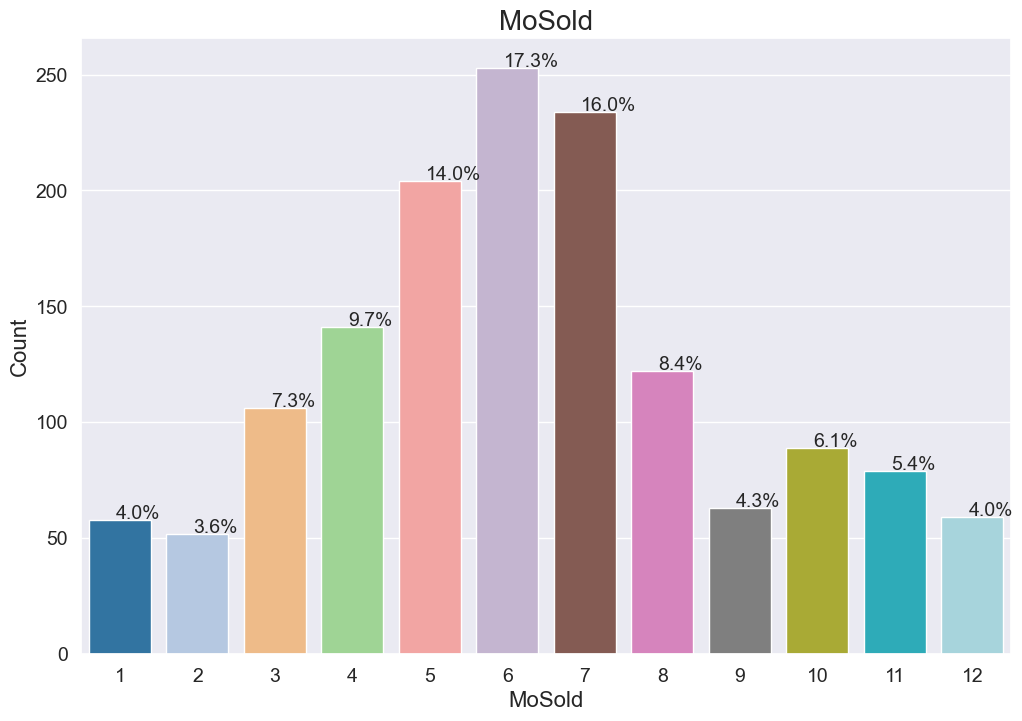

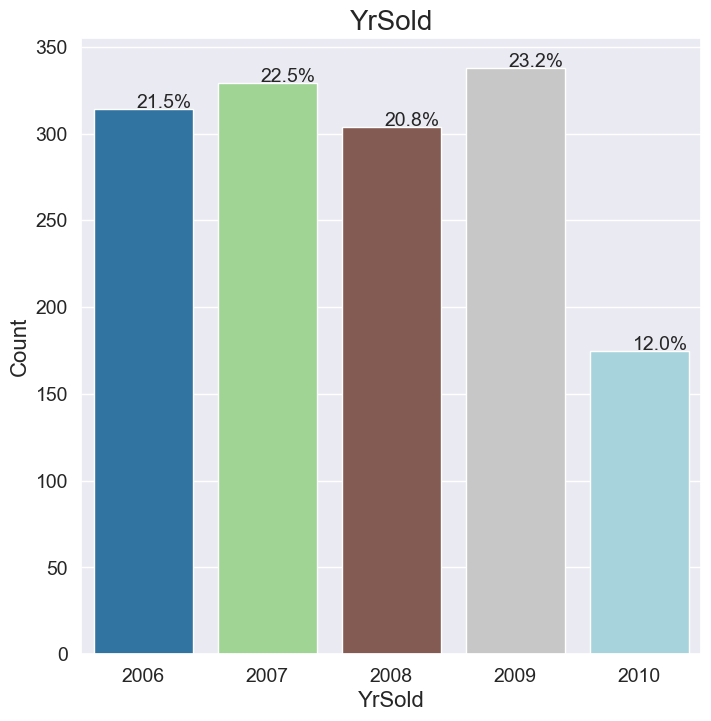

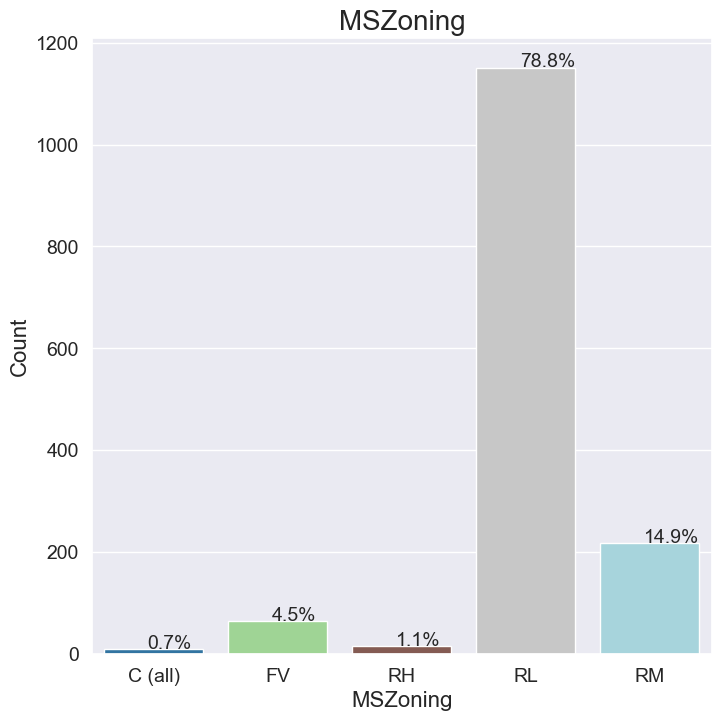

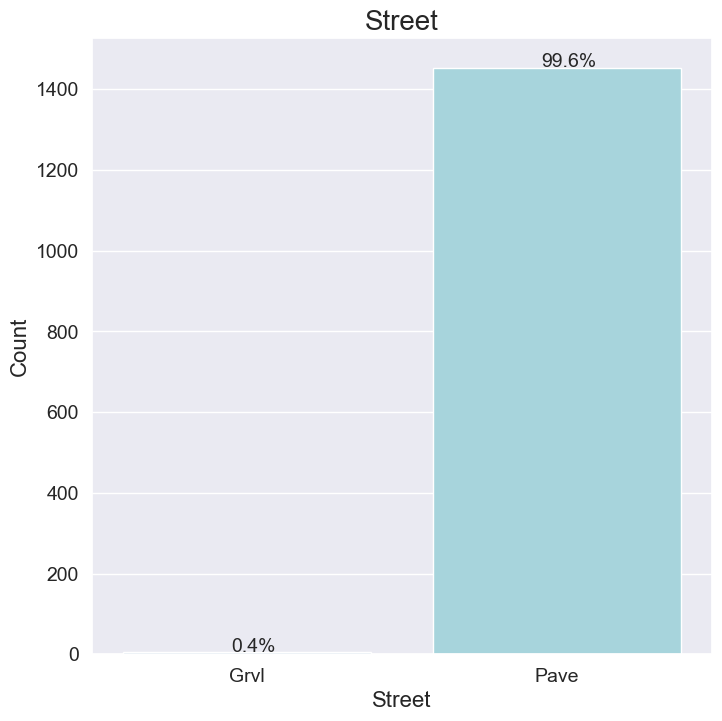

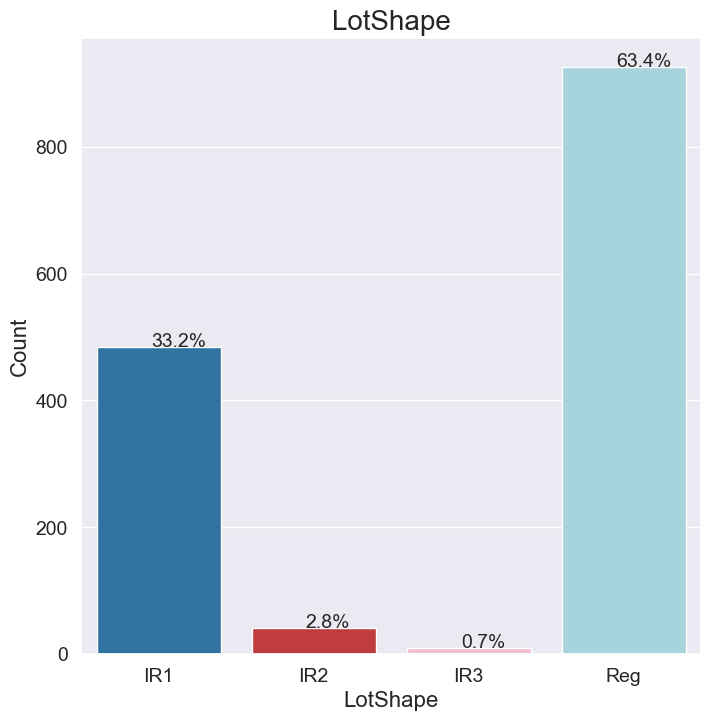

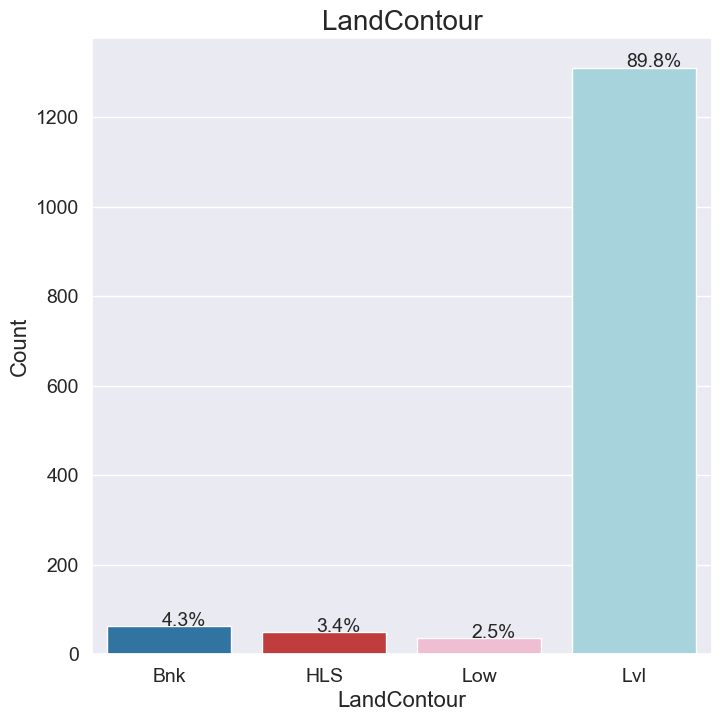

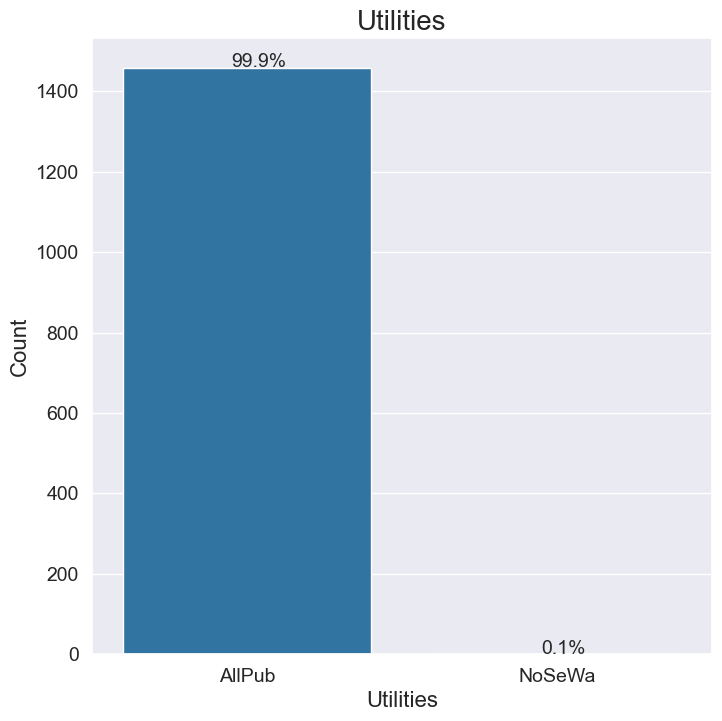

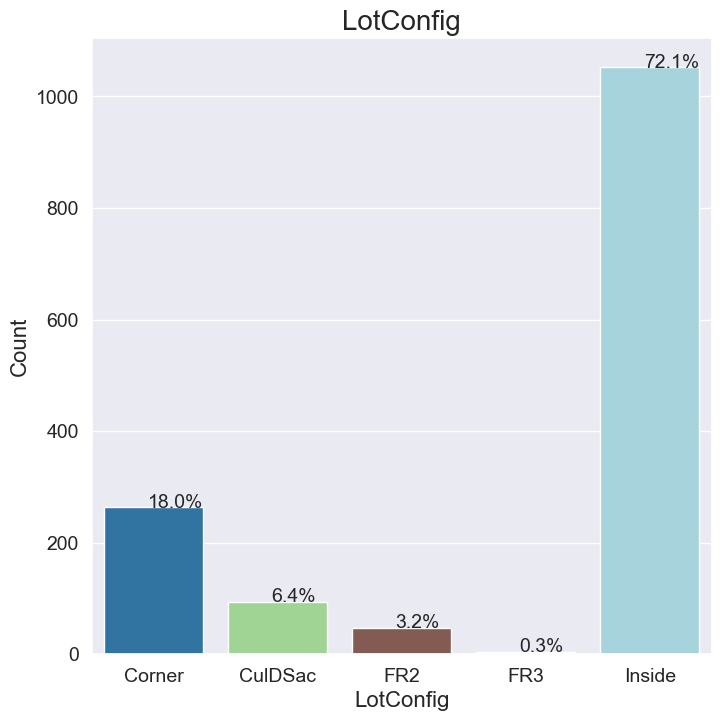

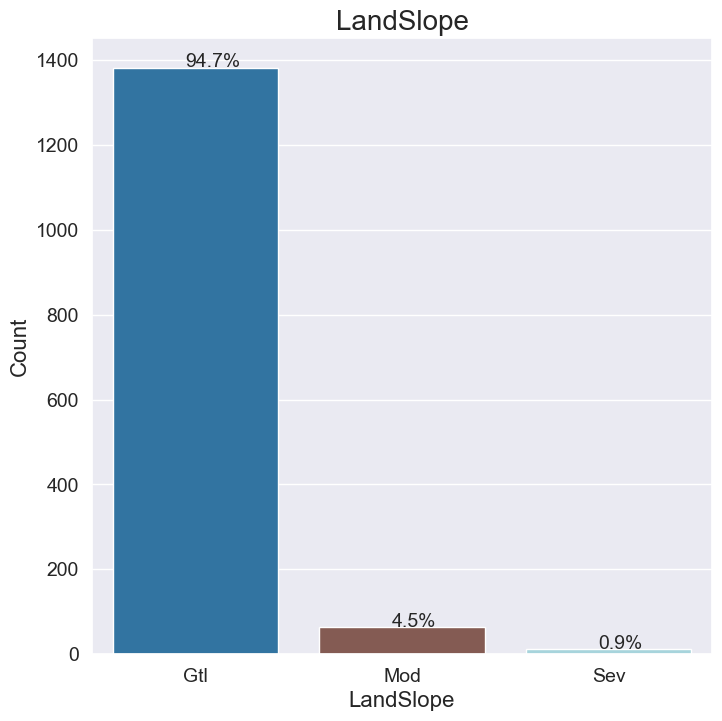

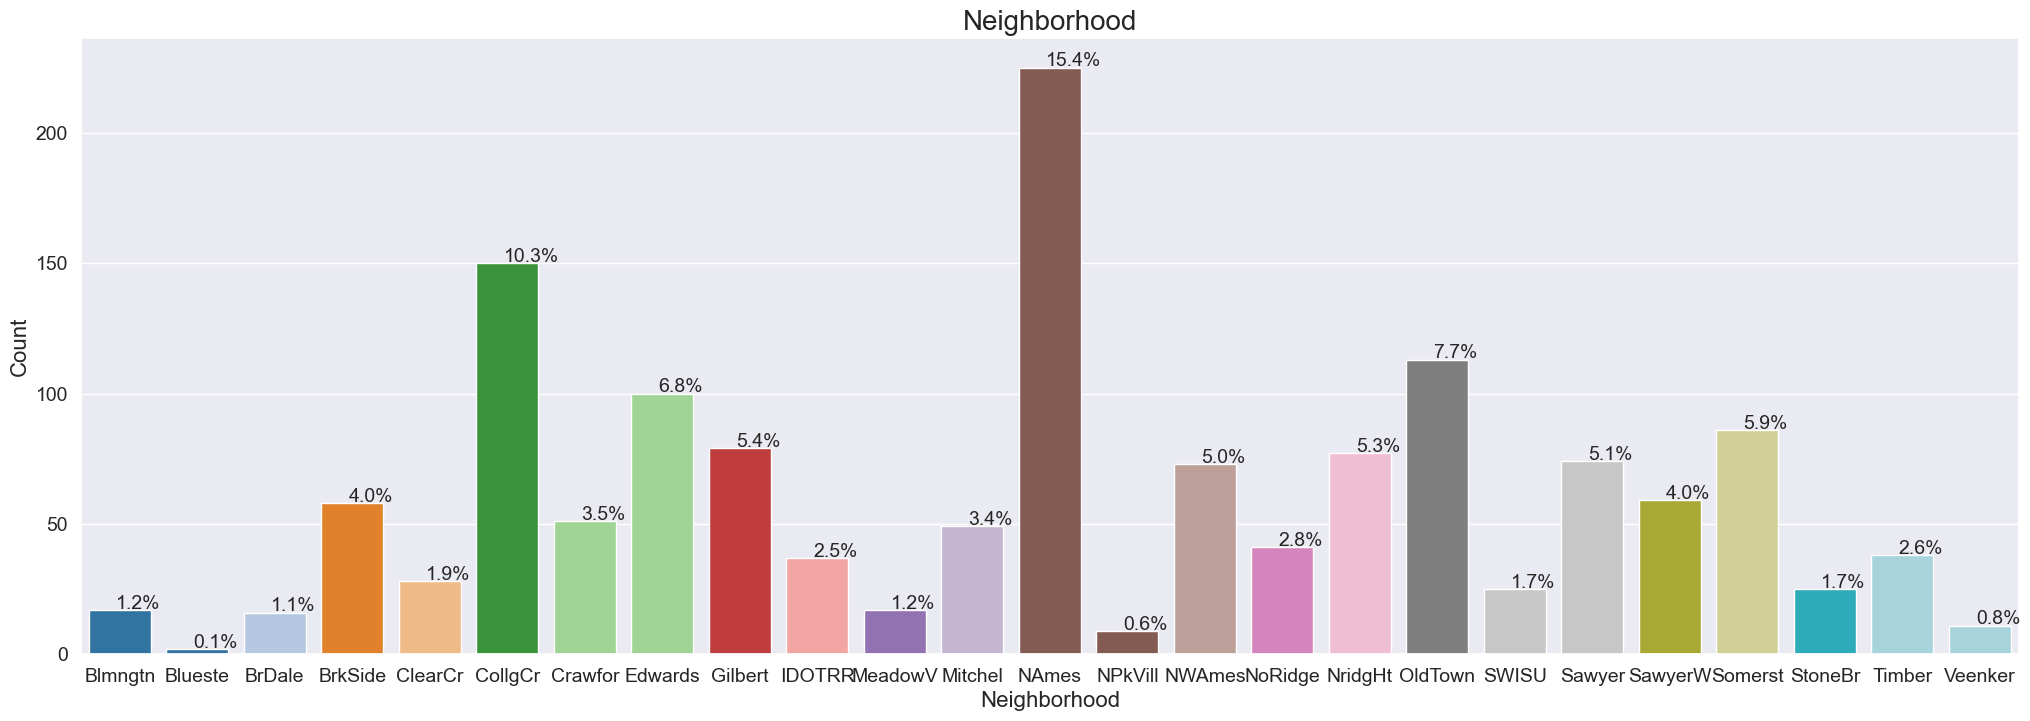

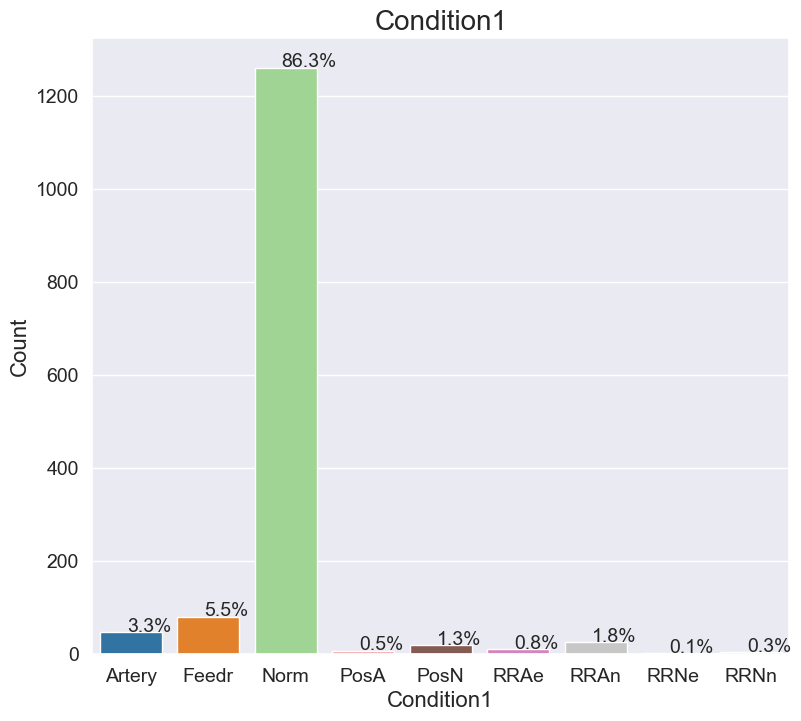

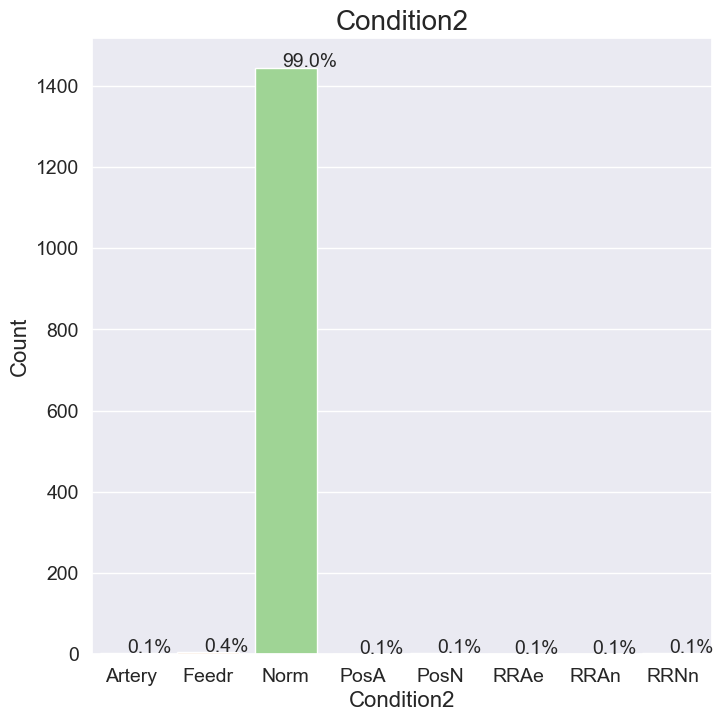

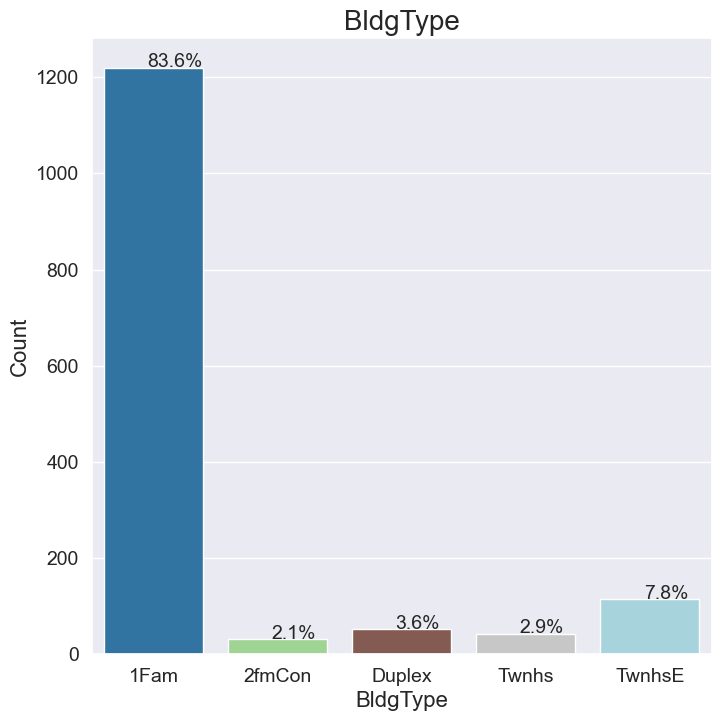

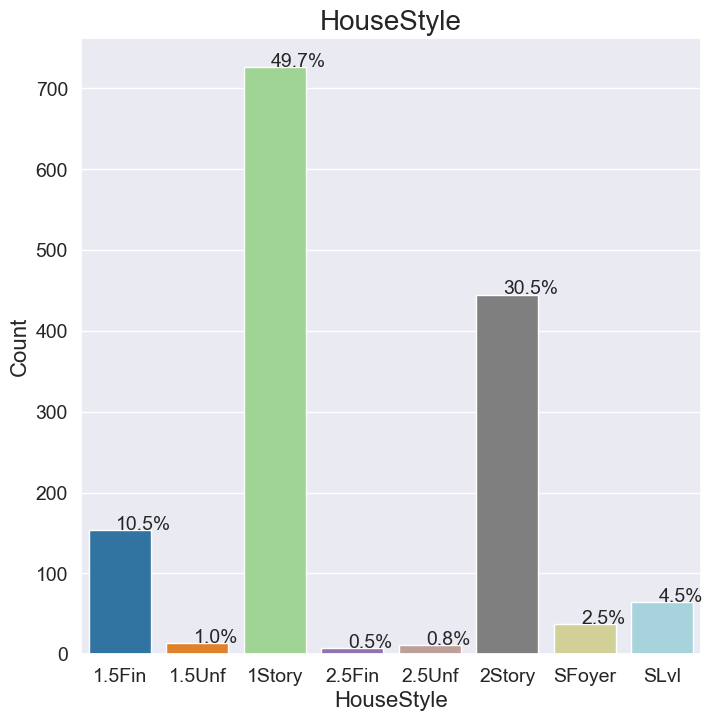

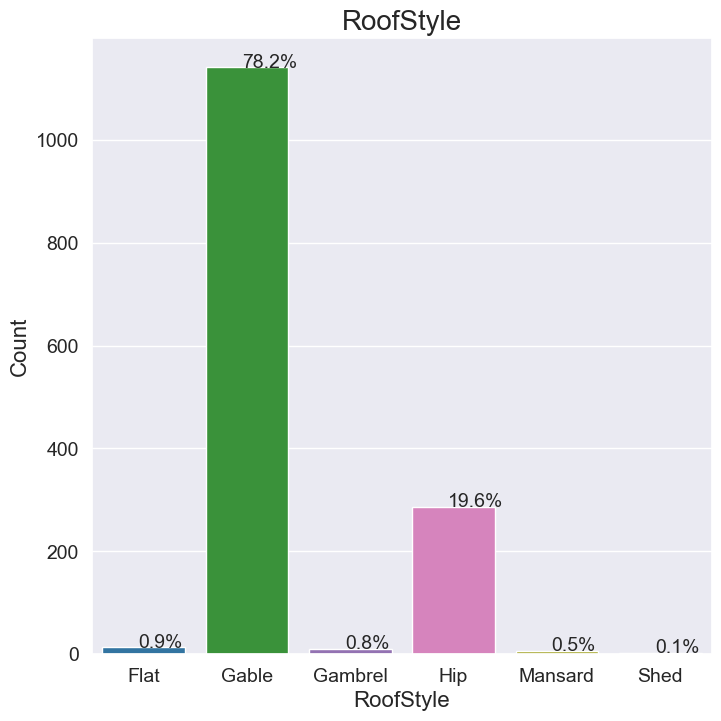

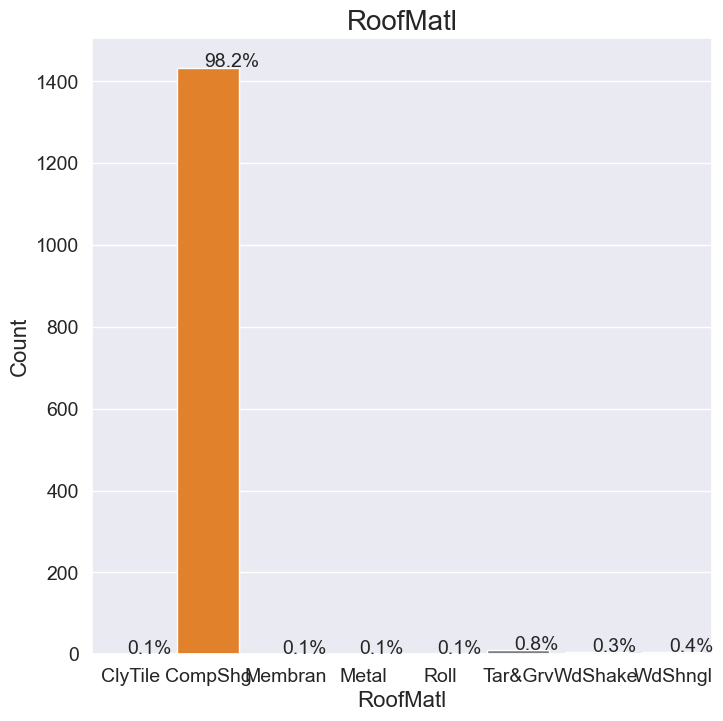

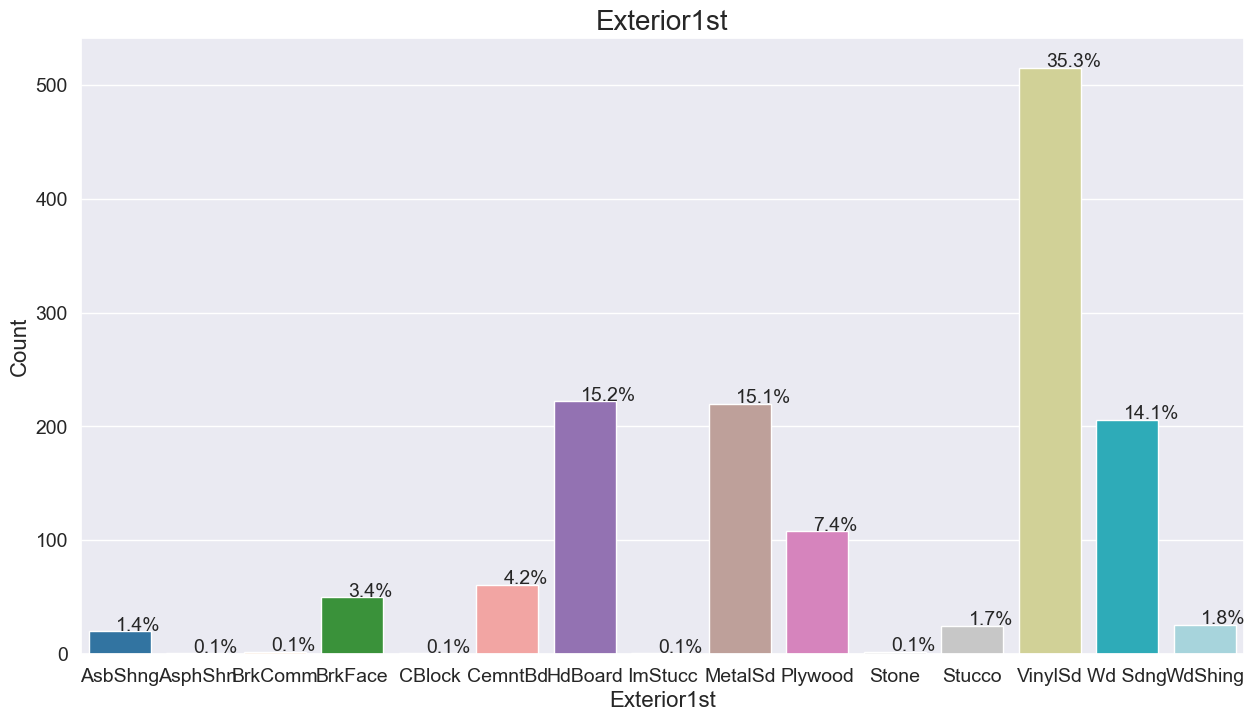

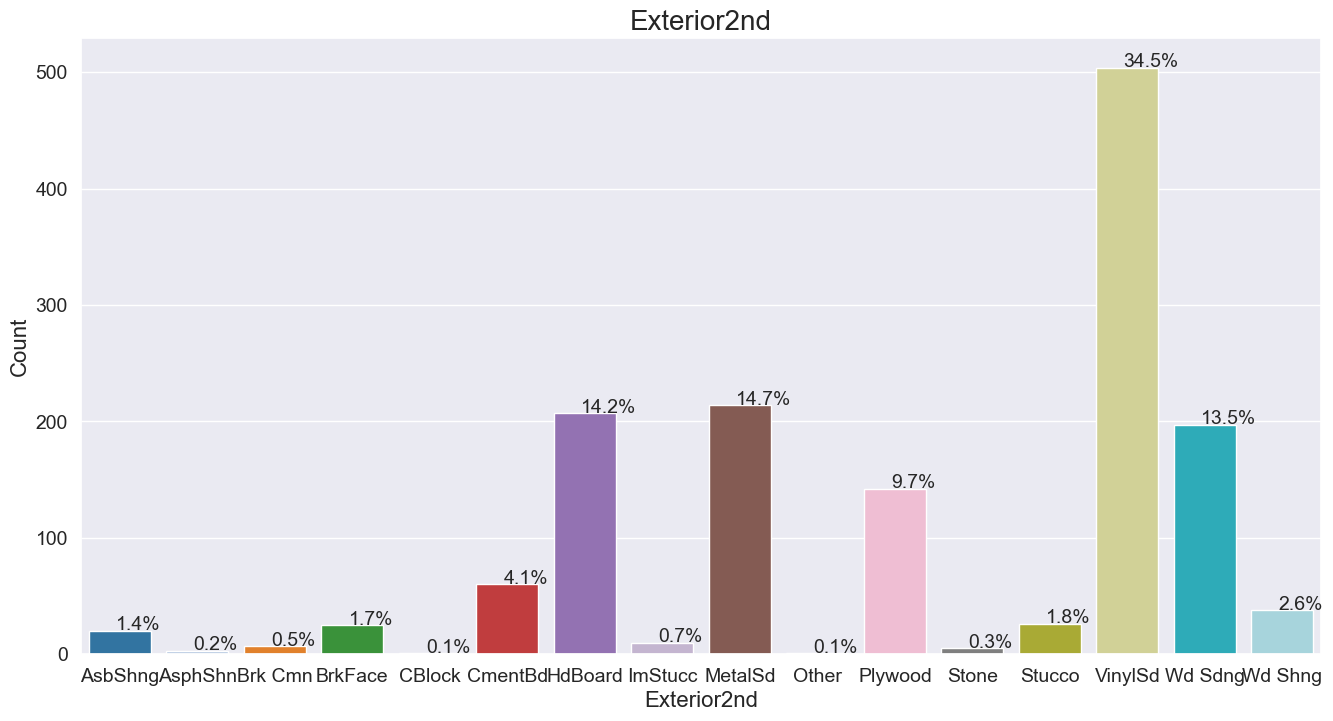

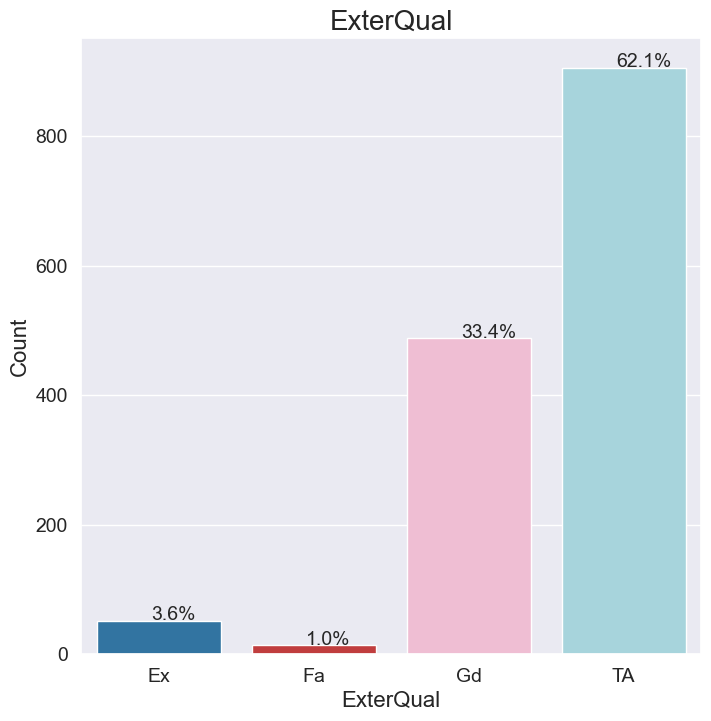

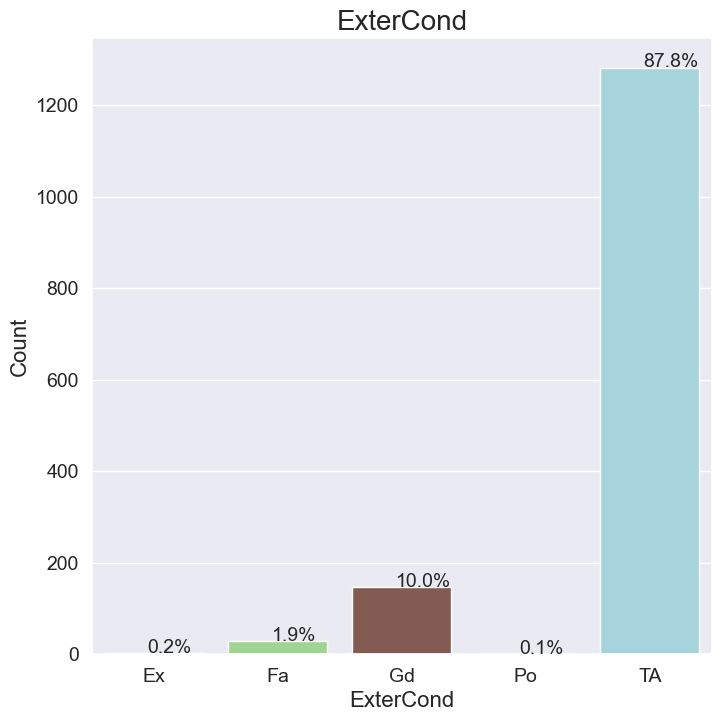

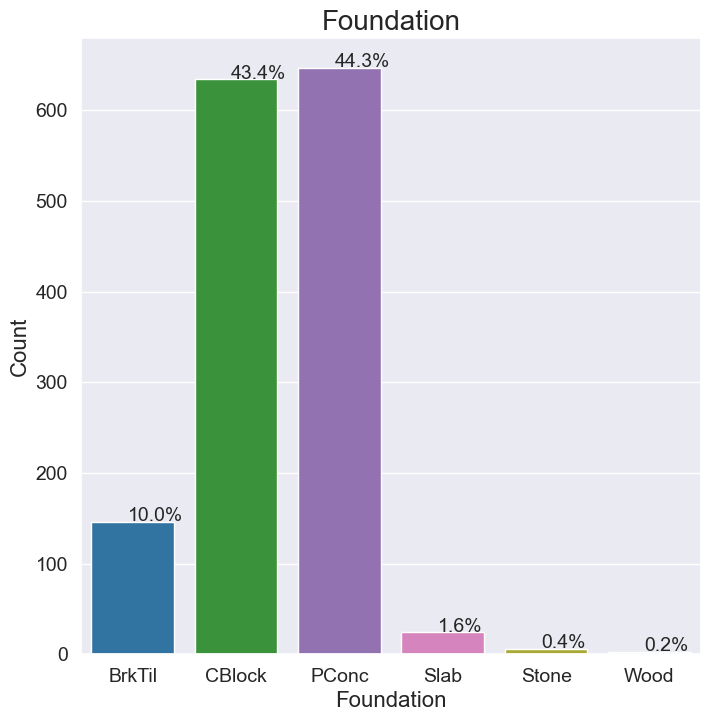

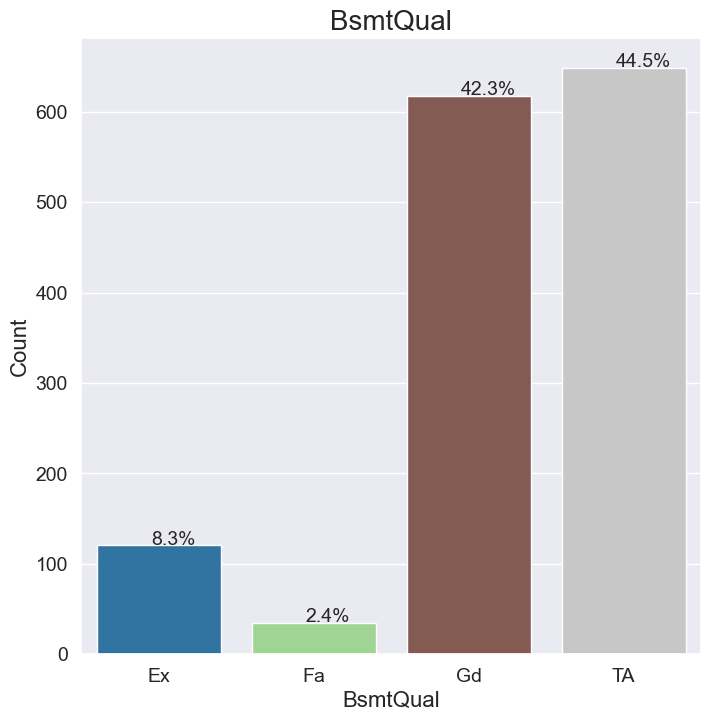

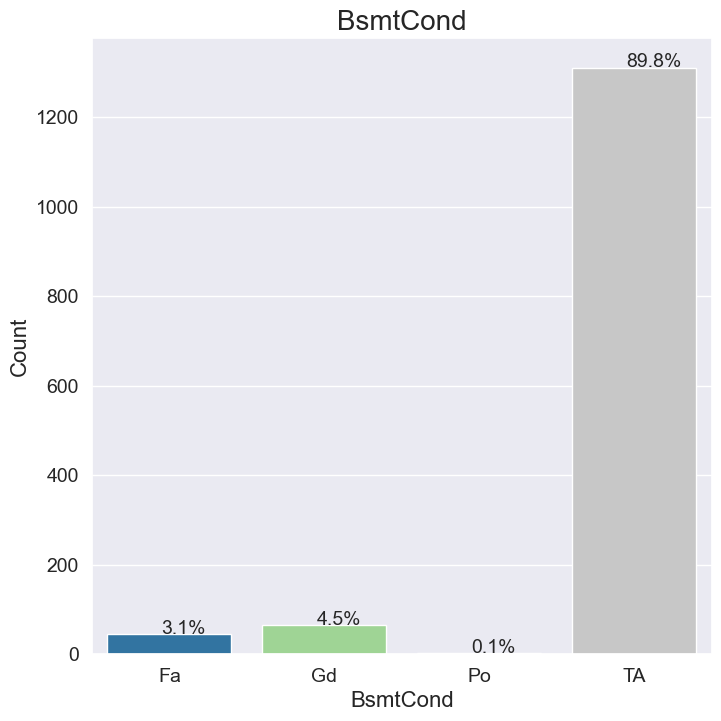

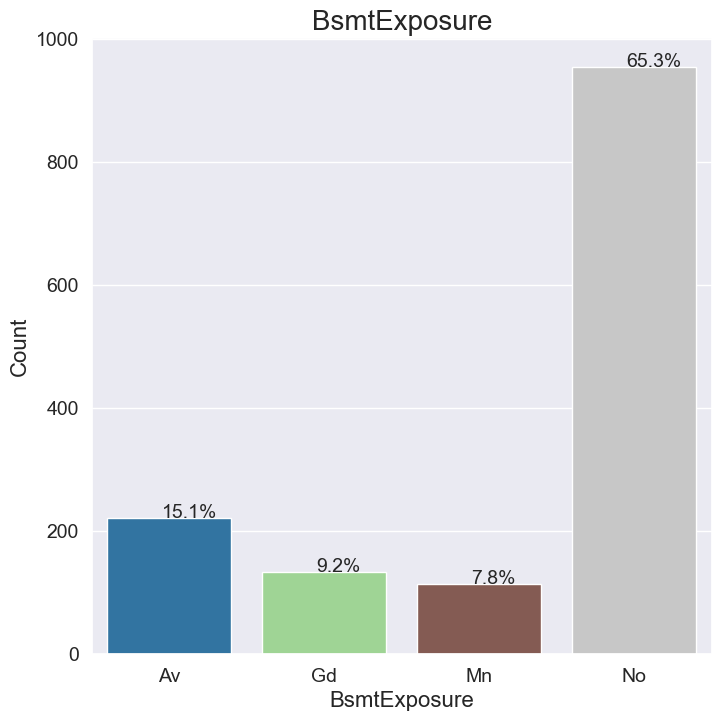

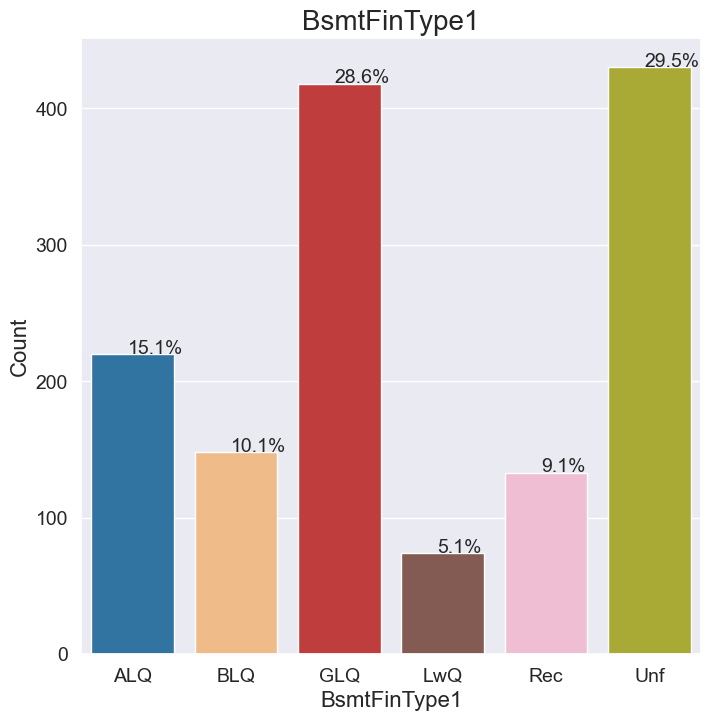

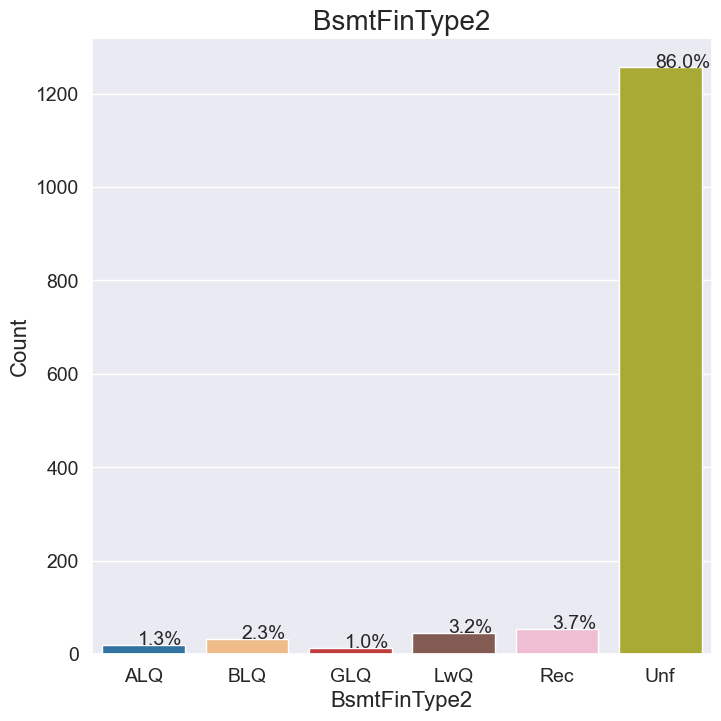

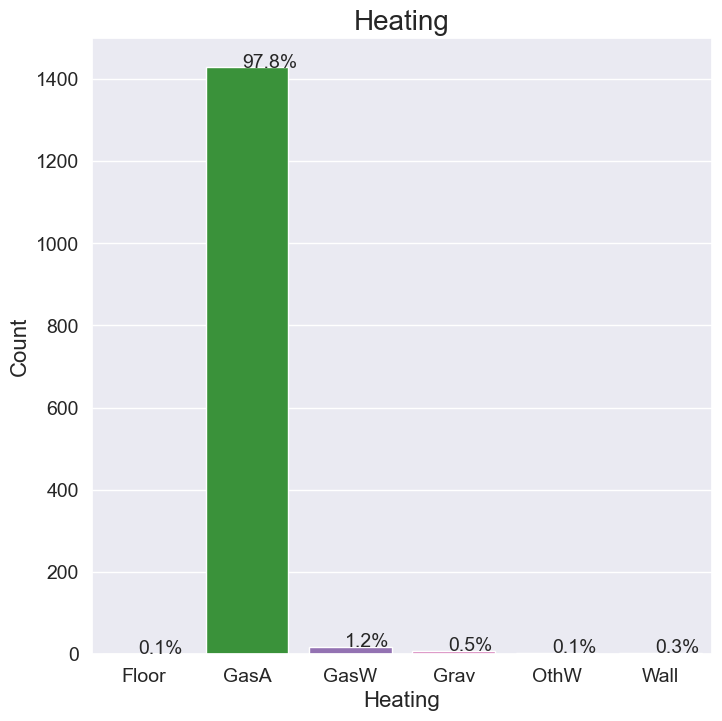

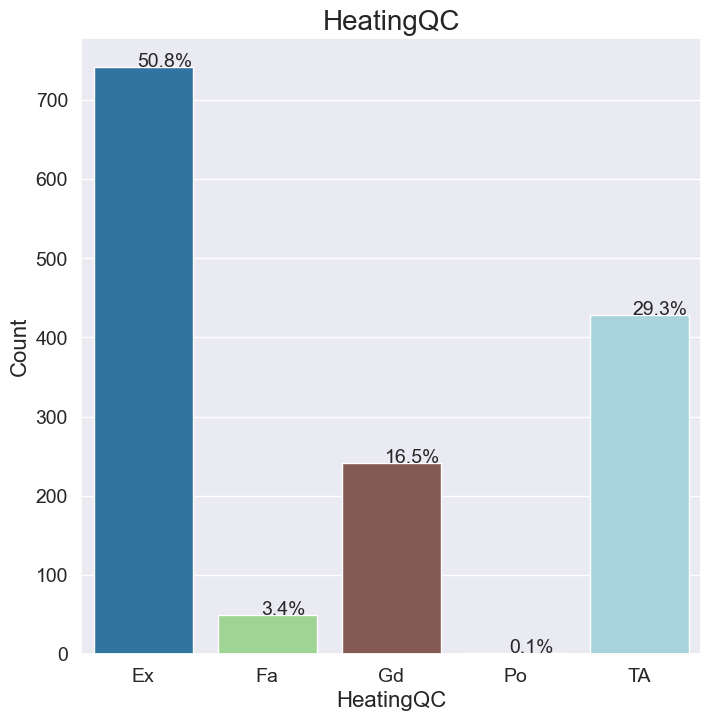

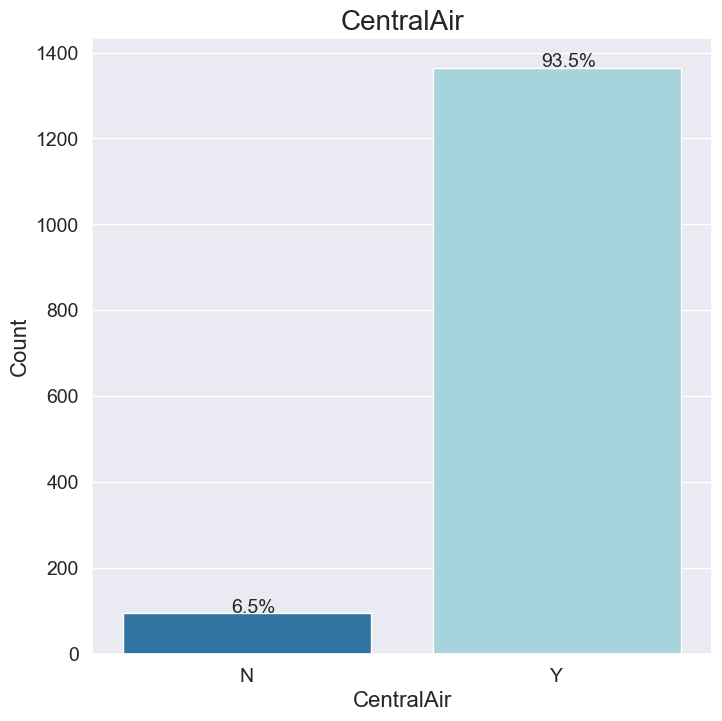

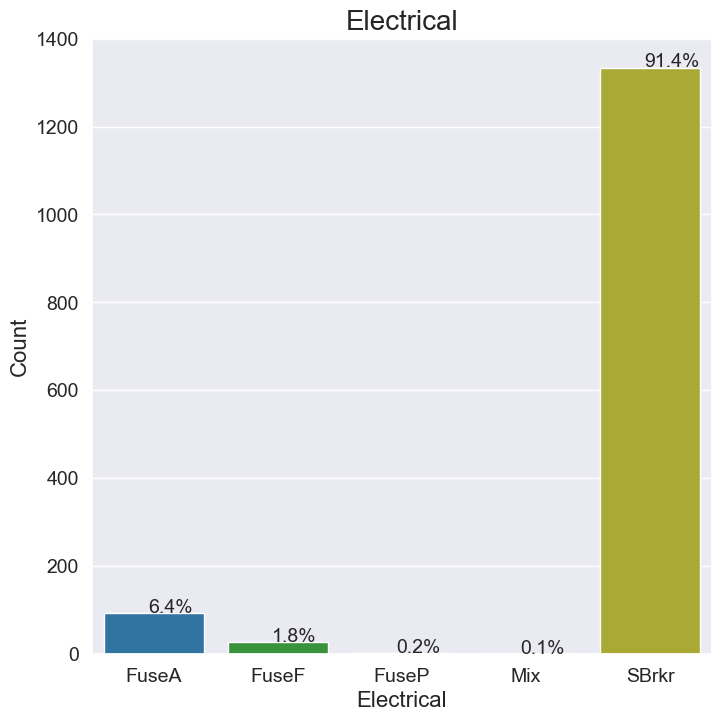

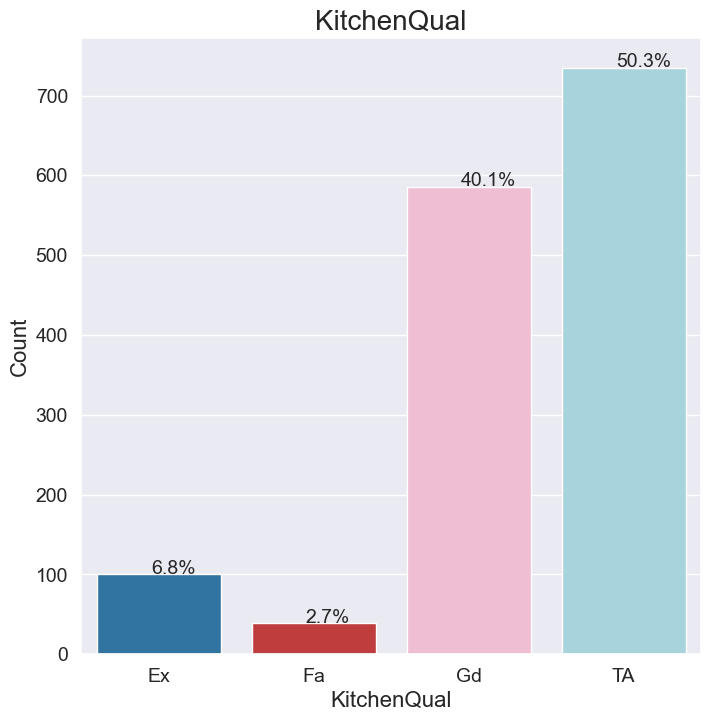

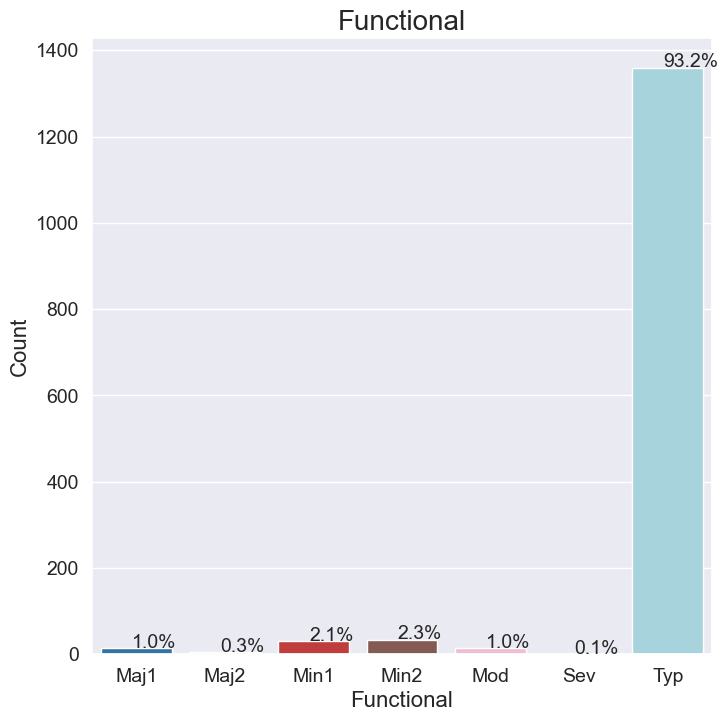

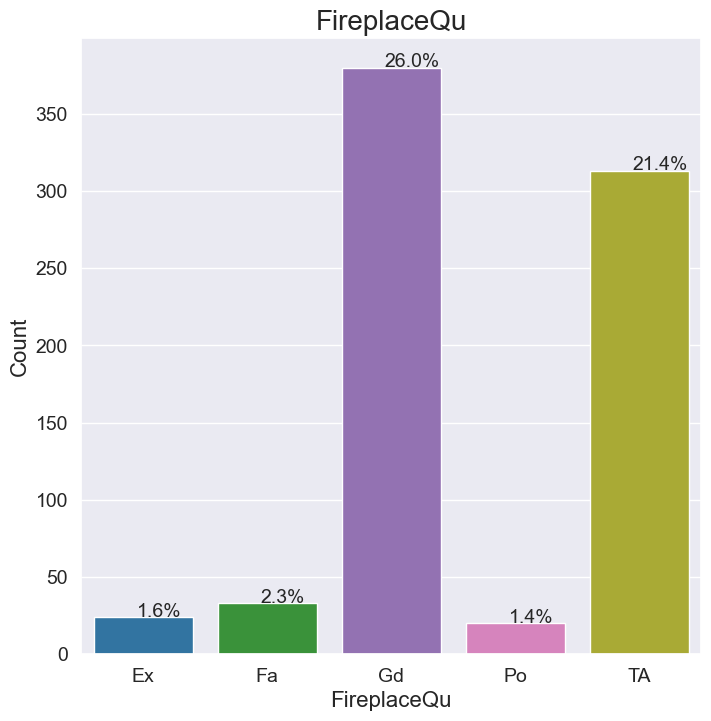

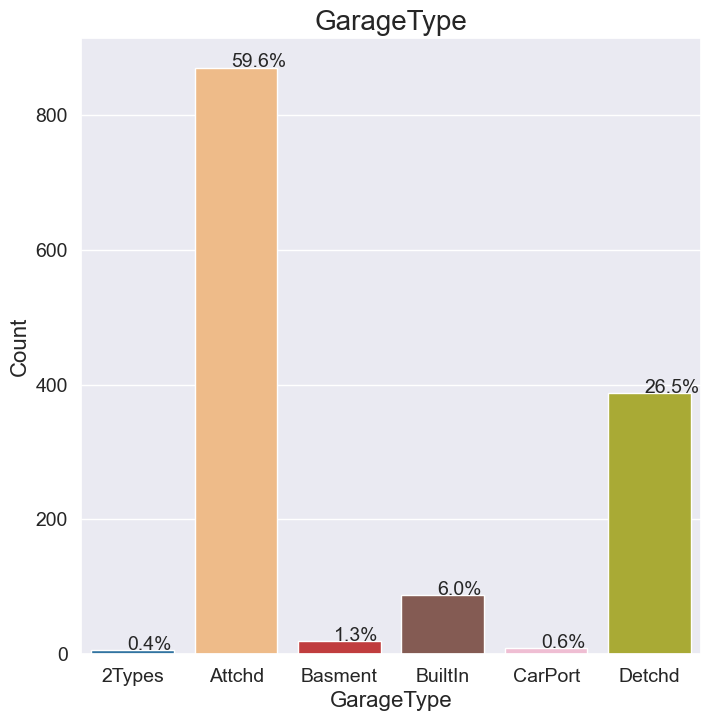

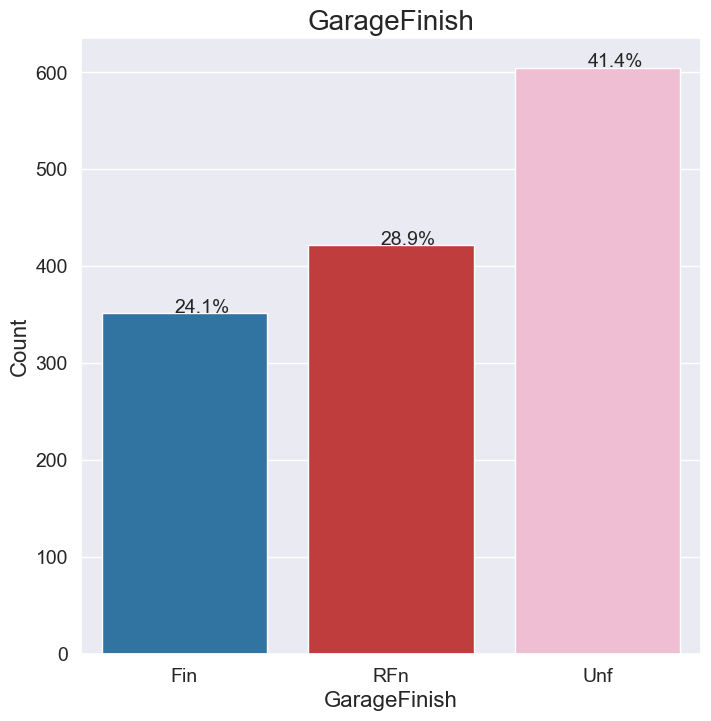

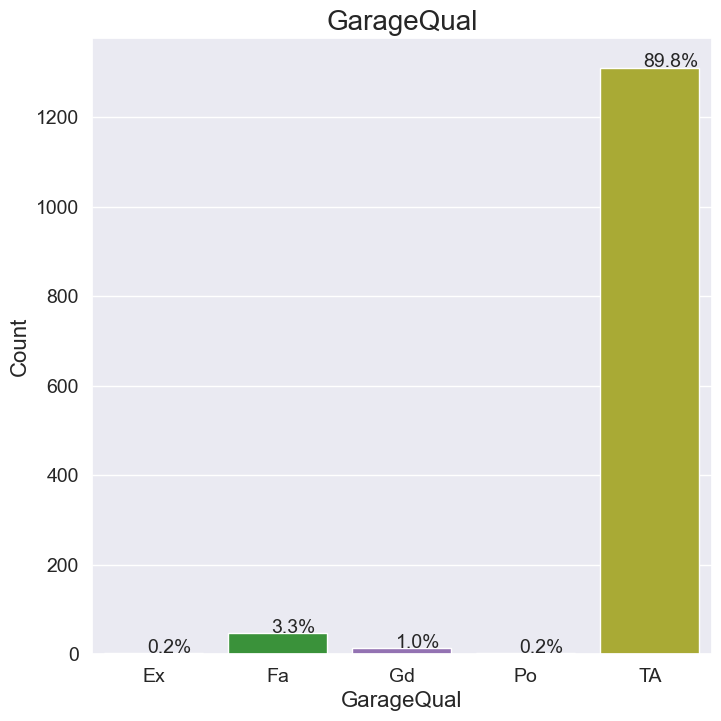

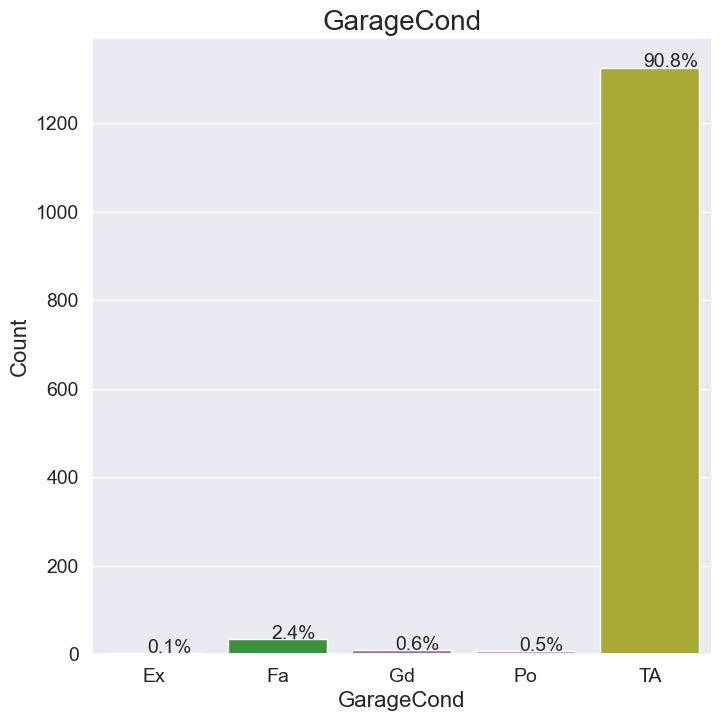

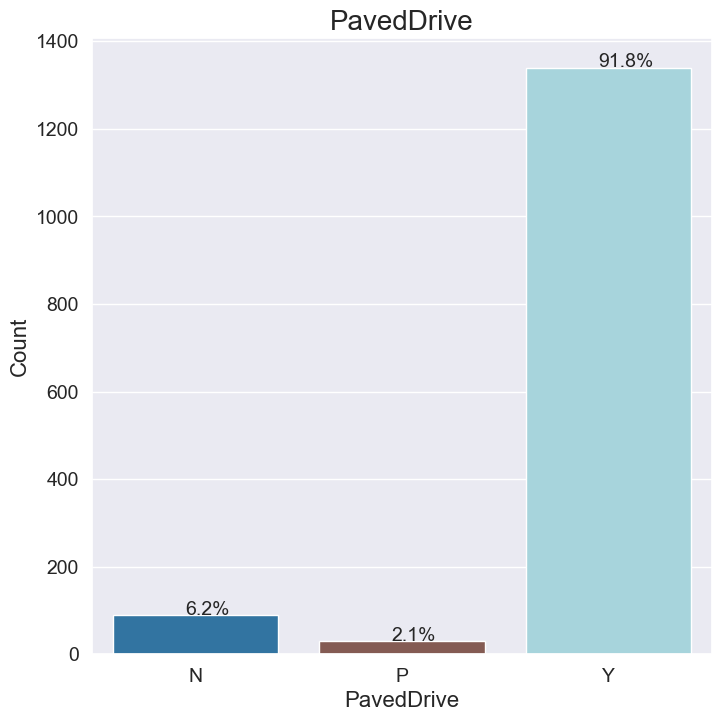

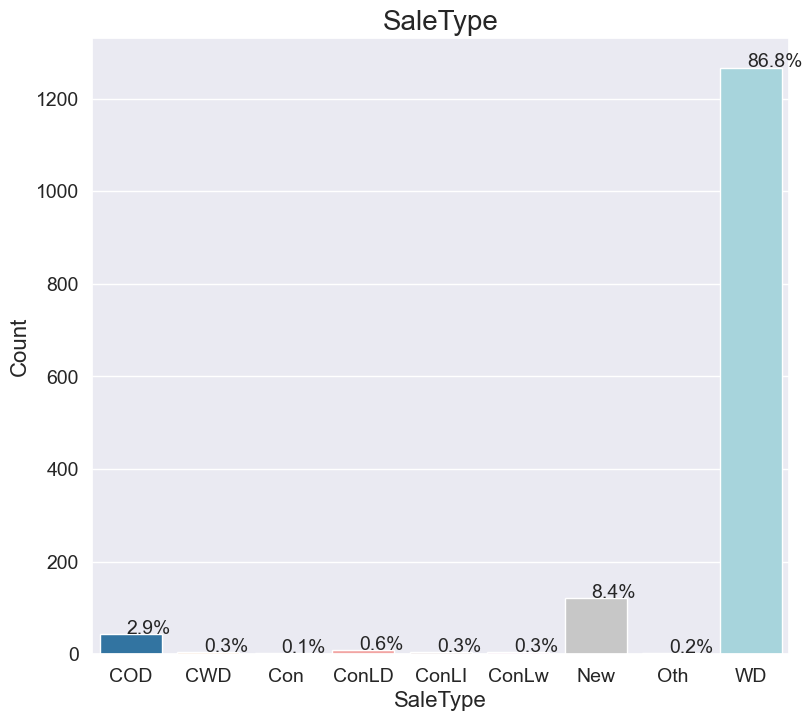

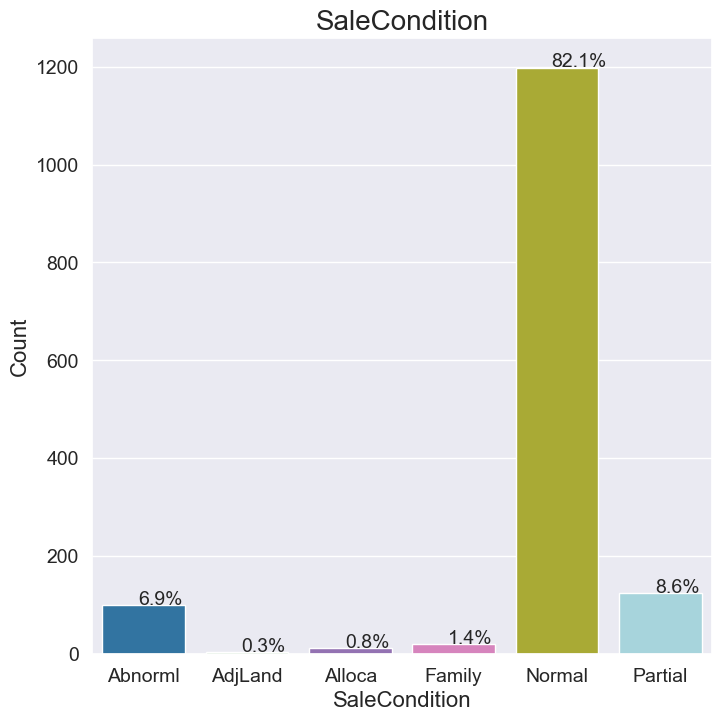

In [28]:
colormap = plt.get_cmap("tab20")  # You can use other colormaps like 'viridis', 'plasma', 'inferno', etc.
for col in train_cleaned.select_dtypes(['category']):
    col_len = len(train_cleaned[col].unique())
    colors = list(colormap(np.linspace(0, 1, col_len)))
    plt.figure(figsize=(col_len if col_len>8 else 8,8))
    ax = sns.countplot(x = train_cleaned[col], palette=colors)
    perc_on_bar(ax,col,train_cleaned[col])

Key Observations:
MSSubClass (15 unique values):

This variable represents the type of dwelling (e.g., one-story, two-story, etc.).
The most common class (top: 20) occurs 536 times.
Quality and Condition Indicators:

OverallQual and OverallCond: These represent the overall quality and condition of the house, with OverallQual having 10 unique values, mostly concentrated around '5' (397 occurrences), indicating a moderate quality of houses.
OverallCond has 9 unique values, with '5' being the most frequent, suggesting most houses have a decent condition.
Bathroom and Bedroom Features:

BsmtFullBath and BsmtHalfBath: These features indicate the number of full and half baths in the basement. The frequency of '0' suggests that many houses do not have a basement bathroom.
FullBath and HalfBath: These features show the total number of full and half baths in the main living areas. Most homes have 2 full baths and 0 half baths.
BedroomAbvGr: The most frequent number of bedrooms is 3, seen in 804 homes.
TotRmsAbvGrd: This variable indicates the total number of rooms in the house, with the most common value being 6 (1392 occurrences).
Garage and Parking Features:

GarageCars: Indicates the number of cars the garage can hold. The most frequent number of cars is 2, seen in 690 homes.
GarageQual and GarageCond: These represent the quality and condition of the garage. The top values suggest many homes have garages in average or good condition (TA, Ex).
PavedDrive: This indicates whether the driveway is paved, with the majority of homes having paved driveways ('Y' with 1311 occurrences).
Pool and Other Outdoor Features:

PoolArea: This has a high number of zeros, indicating very few houses have pools.
ScreenPorch, EnclosedPorch, LowQualFinSF: These features have a significant number of zeros, suggesting that many houses don't have these features. Outliers with extreme values might indicate a few special cases.
Sale Information:

SaleType and SaleCondition: The most frequent sale type is 'WD' (Warranty Deed), and the most frequent sale condition is 'Normal', indicating typical market conditions for most sales.
Year and Month of Sale:

YrSold: The most frequent sale year is 2009 (253 occurrences), which could reflect an important timeframe for the dataset.
MoSold: The most frequent month of sale is 6 (June), with 402 occurrences.
Categorical Variables (Zoning, Condition, Type of Building, etc.):
## Insights from the Data

### General Structure
- **Rows (1460)**: The dataset contains 1460 rows, representing 1460 houses.
- **Columns (81)**: The dataset includes various attributes, both categorical (e.g., `MSZoning`, `Street`, `BldgType`) and numerical (e.g., `OverallQual`, `TotRmsAbvGrd`).

### Key Observations

#### 1. `MSSubClass` (15 unique values)
- This variable represents the type of dwelling (e.g., one-story, two-story, etc.).
- The most common class (`top: 20`) occurs 536 times, suggesting a common dwelling type.

#### 2. Quality and Condition Indicators
- **`OverallQual` and `OverallCond`**: These indicate the overall quality and condition of the house. `OverallQual` has 10 unique values, with '5' being the most frequent, indicating a moderate quality of houses. `OverallCond` has 9 unique values, with '5' being the most frequent, suggesting most houses are in decent condition.

#### 3. Bathroom and Bedroom Features
- **`BsmtFullBath` and `BsmtHalfBath`**: These features show the number of full and half baths in the basement. Many houses (856) have no basement bathroom.
- **`FullBath` and `HalfBath`**: Indicate the total number of full and half baths in the main living areas. Most homes have 2 full baths and 0 half baths.
- **`BedroomAbvGr`**: Most homes have 3 bedrooms, occurring in 804 houses.
- **`TotRmsAbvGrd`**: Indicates the total number of rooms, with the most common value being 6, seen in 1392 homes.

#### 4. Garage and Parking Features
- **`GarageCars`**: The number of cars the garage can hold. The most frequent value is 2 cars, occurring in 690 homes.
- **`GarageQual` and `GarageCond`**: These represent the quality and condition of the garage. Many homes have garages in average or good condition (TA, Ex).
- **`PavedDrive`**: Indicates whether the driveway is paved. The majority of homes (1311) have paved driveways.

#### 5. Pool and Other Outdoor Features
- **`PoolArea`**: Most homes have no pool, as indicated by the many zero values in this column.
- **`ScreenPorch`, `EnclosedPorch`, `LowQualFinSF`**: These features have many zeros, suggesting that most homes do not have these features. Outliers may represent special cases.

#### 6. Sale Information
- **`SaleType` and `SaleCondition`**: The most frequent sale type is 'WD' (Warranty Deed), and the most frequent sale condition is 'Normal', suggesting typical market conditions for most sales.

#### 7. Year and Month of Sale
- **`YrSold`**: The most frequent sale year is 2009 (253 occurrences).
- **`MoSold`**: The most frequent month of sale is June (402 occurrences).

#### 8. Categorical Variables (Zoning, Condition, Type of Building, etc.)
- **`MSZoning`**: Most homes are in 'RL' (Residential Low Density) zones.
- **`Street` and `LotShape`**: Most homes are on paved streets and have regular lot shapes.
- **`Neighborhood`**: The most frequent neighborhood is 'NAmes' (North Ames), with 331 occurrences.
- **`BldgType` and `HouseStyle`**: Most homes are '1Fam' (Single Family), and the most common style is '1Story' (One Story).

#### 9. Materials and Quality Indicators
- **`RoofStyle` and `RoofMatl`**: Most homes have Gable roofs and composite shingles.
- **`ExterQual`, `ExterCond`, `BsmtQual`**: Majority of houses have average to excellent exterior quality and condition, with high-quality basements (TA).

### Summary Insights
- The dataset represents **one-story, single-family homes** with **2-car garages** and **no pools**.
- Most homes are **moderately well-maintained**, with many having **average quality** in terms of both condition and exterior.
- A large proportion of homes have **no basements** or very few basement-related features.
- Homes are mostly located in **suburban neighborhoods**, with low-density residential zoning.
- **Most sales** are typical market sales under **normal conditions**, and the **peak sale year** is 2009, with **June** being the most frequent month of sale.

#### Further analysis could focus on exploring relationships between these features and house pricing or other target variables.

- **MSZoning**: Most homes fall under the 'RL' (Residential Low Density) zoning category.
Street and LotShape: Most homes are on paved streets with regular lot shapes, indicating typical suburban areas.
- **Neighborhood**: The top neighborhood is 'NAmes' (North Ames), with the highest frequency of 331 occurrences.
- **BldgType and HouseStyle**: The most frequent building type is '1Fam' (Single Family), with the most common style being '1Story' (One Story), indicating that most houses are one-story single-family homes.
Materials and Quality Indicators:

- **RoofStyle and RoofMatl**: Gable roofs and composite shingles are the most common materials, indicating typical house structures.
ExterQual, ExterCond, BsmtQual: The majority of houses have average to excellent exterior quality and condition, and the basement quality is also relatively high (TA).

## BIVARIATE ANALYSIS
#### HEAT MAP

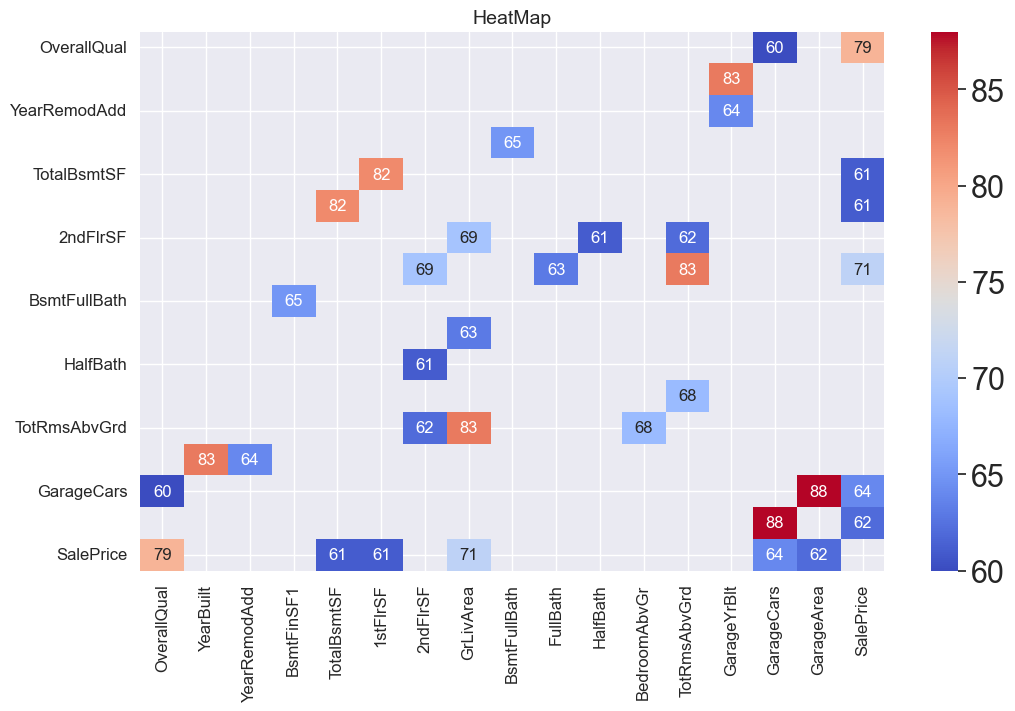

In [29]:
corr_matrix = train_num.corr()
strong_corr = round(corr_matrix.where((abs(corr_matrix)>0.6) & (corr_matrix<1))*100,0)
strong_corr = strong_corr.dropna(how='all').dropna(axis=1, how='all')
plt.figure(figsize=(12, 7))
sns.heatmap(
    strong_corr, 
    annot=True,
    # linewidths=0, 
    cbar=True, 
    cmap="coolwarm",
    annot_kws={"size": 12}  # Set font size for annotations
)
plt.title("HeatMap", fontsize=14)
plt.xticks(size = 12)  # Set fontsize for x-axis ticks
plt.yticks(size = 12)  # Set fontsize for x-axis ticks
plt.show()

## **Heatmap Insights**

#### **1. Strong Positive Correlations**  
- **GarageCars & GarageArea (0.88):**  
  - The number of garage cars and the total garage area are highly correlated. This makes sense since larger garages typically accommodate more cars.  

- **TotRmsAbvGrd & 1stFlrSF (0.83):**  
  - More rooms above ground tend to be associated with larger first-floor square footage, indicating that larger houses typically have more rooms.  

- **GarageYrBlt & YearBuilt (0.83):**  
  - The year the garage was built is strongly correlated with the year the house was built, suggesting that most garages were constructed at the same time as the house.  

- **TotalBsmtSF & 1stFlrSF (0.82):**  
  - Houses with large first floors tend to have large basements, possibly due to similar floor plans.  

- **OverallQual & SalePrice (0.79):**  
  - Higher quality houses tend to have higher sale prices, which is expected.  

#### **2. Moderate Positive Correlations**  
- **GrLivArea & SalePrice (0.71):**  
  - The greater the above-ground living area, the higher the sale price, indicating that buyers value more living space.  

- **2ndFlrSF & GrLivArea (0.69):**  
  - Houses with more second-floor space generally have a larger total living area.  

- **FullBath & GrLivArea (0.63):**  
  - More full bathrooms tend to be present in houses with larger living spaces.  

#### **3. Weak to No Correlation Removed**  
- The heatmap effectively removes weak correlations, helping to focus on the strongest relationships in the dataset.  

#### **4. Conclusion**  
- Features like **OverallQual, GarageCars, TotalBsmtSF, 1stFlrSF, and GrLivArea** are strong predictors of **SalePrice** and should be prioritized in predictive models.  
- Some variables are redundant, such as **GarageCars & GarageArea**, which provide similar information.  
- The dataset reflects logical relationships, such as larger houses having more rooms and bigger basements.

#### There could be further multi variate analysis in which each numerical feature can be grouped by categorical feature and then make further analysis.
#### Next we need to perform feature selection as many features have high correlation and / or possibly very less participation in the model predictions
#### Based on the current scenario root mean square error could be a good a good performance metric since it provides least amount of error possible for optimal results
#### As this is a drafted version and does not reflect the real work, we will be moving forward to predictive modeling.

In [30]:
df = train_cleaned.copy()

In [31]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   LotFrontage    1201 non-null   float64 
 2   LotArea        1460 non-null   int64   
 3   OverallQual    1460 non-null   category
 4   OverallCond    1460 non-null   category
 5   YearBuilt      1460 non-null   int64   
 6   YearRemodAdd   1460 non-null   int64   
 7   MasVnrArea     1452 non-null   float64 
 8   BsmtFinSF1     1460 non-null   int64   
 9   BsmtFinSF2     1460 non-null   int64   
 10  BsmtUnfSF      1460 non-null   int64   
 11  TotalBsmtSF    1460 non-null   int64   
 12  1stFlrSF       1460 non-null   int64   
 13  2ndFlrSF       1460 non-null   int64   
 14  LowQualFinSF   1460 non-null   int64   
 15  GrLivArea      1460 non-null   int64   
 16  BsmtFullBath   1460 non-null   category
 17  BsmtHalfBath   1460 non-null   ca

In [32]:
scalar = StandardScaler()
for i in df.columns:
    if df[i].dtype=='category':
        df[i]=scalar.fit_transform(df[i])
df['SalePrice']=np.log1p(df['SalePrice'])
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 42)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### Random Forest Regressor
-  ** We build our model using Random Forest Regressor function and estimate the error using RMS

In [282]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [267]:
y_pred=rf.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared for y_test and y_pred = {rms}')

Root Mean Squared for y_test and y_pred = 0.0030476639246966174


In [ ]:
acc=rf.score(X_test,y_test)
print(f'Accuracy score for test results = {acc}')

Accuracy score for test results = 0.8818520972354706


## Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [286]:
# Choose the type of classifier
rfr_estimator = RandomForestRegressor(random_state=42)

# Create a scorer object for use in grid search
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Parameters for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create GridSearchCV
grid_search = GridSearchCV(rfr_estimator, parameters, scoring=scorer, cv=5, n_jobs=-1, verbose=1)

# Calculate the number of fits: 5 folds * number of parameter combinations
num_fits = 5 * len(ParameterGrid(parameters))

# Create a tqdm progress bar
progress_bar = tqdm(total=num_fits, desc='Fitting GridSearchCV', unit='fit')

# Custom verbose callback to update the progress bar
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y, **fit_params):
        # Call the fit method of GridSearchCV
        super().fit(X, y, **fit_params)
        # After fitting, update the progress bar
        for _ in range(self.cv * len(self.param_grid)):
            progress_bar.update(1)
        return self

# Use the custom GridSearchCV class with the progress bar
grid_search_with_progress = TQDMGridSearchCV(rfr_estimator, parameters, scoring=scorer, cv=5, n_jobs=-1, verbose=0)

# Run the grid search
grid_search_with_progress.fit(X_train, y_train)

# Close the progress bar
progress_bar.close()

# Set the clf to the best combination of parameters
print("Best Parameters:", grid_search_with_progress.best_params_)
print("Best Score:", grid_search_with_progress.best_score_)


Fitting GridSearchCV:   1%|          | 30/3240 [03:56<7:01:42,  7.88s/fit]  

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: -0.0013817958202902883


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Ensure all metrics are imported
rms = sqrt(mean_squared_error(y_test, y_pred))
# print(rms)
rfr_estimator.fit(X_train, y_train)
acc=rfr_estimator.score(X_test,y_test)
# print(acc)
# # Compute the R-squared score (accuracy) on the test set
# acc = best_rf.score(x_test, y_test)

# # Print the R-squared score
# print(f"R-squared (Accuracy) on Test Set: {acc}")
# # Print the evaluation metrics
print(f"RMS: {rms}")
print(f"ACCURACY: {acc}")
# print(f"MAE: {mae}")
# print(f"R-squared: {r2}")

RMS: 0.4508483165003
ACCURACY: 0.8832687448644468


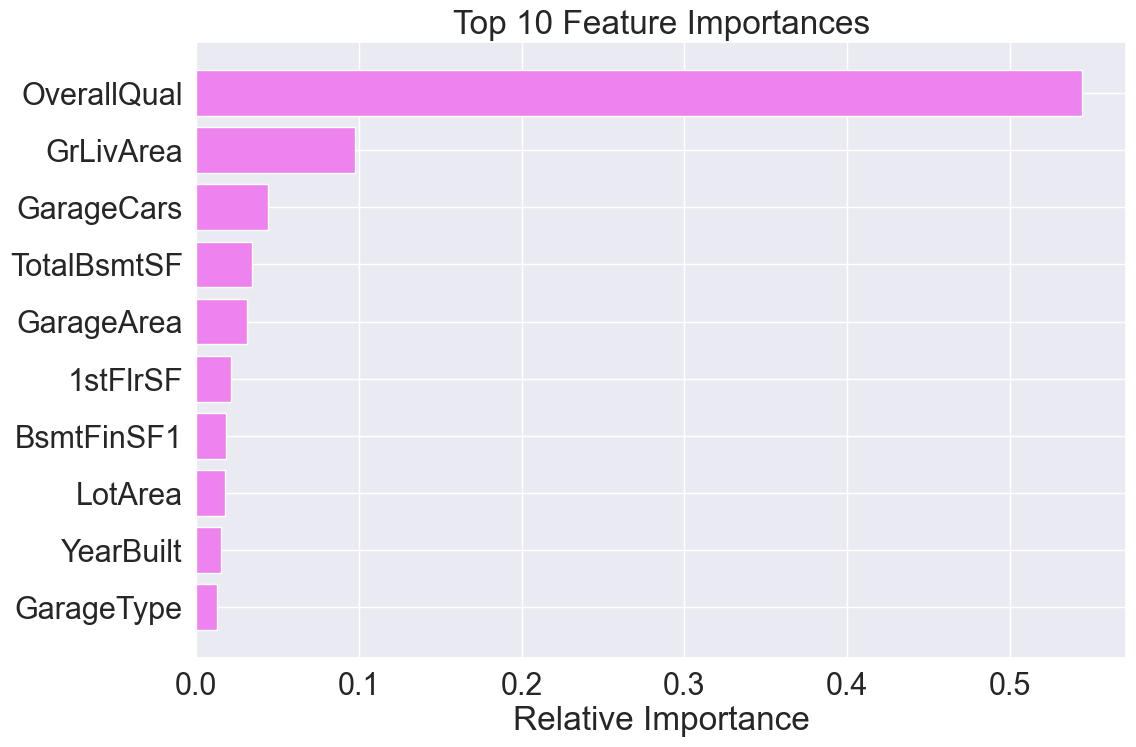

In [296]:
# Get feature importances from the trained model
importances = rfr_estimator.feature_importances_

# Get indices of the sorted importances
indices = np.argsort(importances)[::-1]  # Reverse to get descending order

# Get the top 10 feature names
top_10_indices = indices[:10]
top_10_importances = importances[top_10_indices]
top_10_feature_names = X_train.columns[top_10_indices]

# Plotting the top 10 feature importances
plt.figure(figsize=(12,8))
plt.title('Top 10 Feature Importances')
plt.barh(range(10), top_10_importances, color='violet', align='center')
plt.yticks(range(10), top_10_feature_names)
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()